# National Parks Visitation Analysis
## Individual Park Trends and Seasonality Analysis


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)


## 1. Load and Clean Data


In [95]:
# Load data
df = pd.read_csv('Datasets/national_parks.csv')

# Clean numeric columns
numeric_columns = ['RecreationVisits', 'NonRecreationVisits']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

df['RecreationVisits'] = df['RecreationVisits'].fillna(0)
df['NonRecreationVisits'] = df['NonRecreationVisits'].fillna(0)
df['TotalVisits'] = df['RecreationVisits'] + df['NonRecreationVisits']

print(f"Data loaded: {len(df)} records")
print(f"Parks: {df['ParkName'].nunique()}")
print(f"Years: {df['Year'].min()} - {df['Year'].max()}")


Data loaded: 34151 records
Parks: 63
Years: 1979 - 2024


## 2. Cluster Parks by Size


In [96]:
# Calculate total visitation per park
park_totals = df.groupby('ParkName')['TotalVisits'].sum().reset_index()
park_totals.columns = ['ParkName', 'TotalVisitsAllTime']

# Cluster into 4 size categories using quantiles
park_totals['SizeCategory'] = pd.qcut(park_totals['TotalVisitsAllTime'], 
                                        q=4, 
                                        labels=['Small', 'Medium', 'Large', 'Extra Large'])

# Merge back to main dataframe
df = df.merge(park_totals[['ParkName', 'SizeCategory']], on='ParkName', how='left')

print("Park distribution by size:")
print(park_totals['SizeCategory'].value_counts())
print(f"\nExtra Large parks: {park_totals[park_totals['SizeCategory']=='Extra Large']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Extra Large']['TotalVisitsAllTime'].max():,.0f}")
print(f"Large parks: {park_totals[park_totals['SizeCategory']=='Large']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Large']['TotalVisitsAllTime'].max():,.0f}")
print(f"Medium parks: {park_totals[park_totals['SizeCategory']=='Medium']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Medium']['TotalVisitsAllTime'].max():,.0f}")
print(f"Small parks: {park_totals[park_totals['SizeCategory']=='Small']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Small']['TotalVisitsAllTime'].max():,.0f}")


Park distribution by size:
SizeCategory
Small          16
Medium         16
Extra Large    16
Large          15
Name: count, dtype: int64

Extra Large parks: 92,890,436 - 895,608,088
Large parks: 39,353,231 - 88,350,565
Medium parks: 13,774,185 - 33,870,544
Small parks: 321,697 - 11,308,895


## 3. Calculate Average Monthly Visitation by Park


In [97]:
# Calculate average visitation by park and month across all years
monthly_avg = df.groupby(['ParkName', 'SizeCategory', 'Month'])['TotalVisits'].mean().reset_index()
monthly_avg.columns = ['ParkName', 'SizeCategory', 'Month', 'AvgVisits']

print(f"Monthly averages calculated for {monthly_avg['ParkName'].nunique()} parks")
monthly_avg.head(12)


Monthly averages calculated for 63 parks


,ParkName,SizeCategory,Month,AvgVisits
0,Acadia NP,Small,1,NaN
1,Acadia NP,Small,2,NaN
2,Acadia NP,Small,3,NaN
3,Acadia NP,Small,4,NaN
4,Acadia NP,Small,5,NaN
5,Acadia NP,Small,6,NaN
6,Acadia NP,Small,7,NaN
7,Acadia NP,Small,8,NaN
8,Acadia NP,Small,9,NaN
9,Acadia NP,Small,10,NaN


## 4. Line Graphs: Monthly Visitation by Park Size


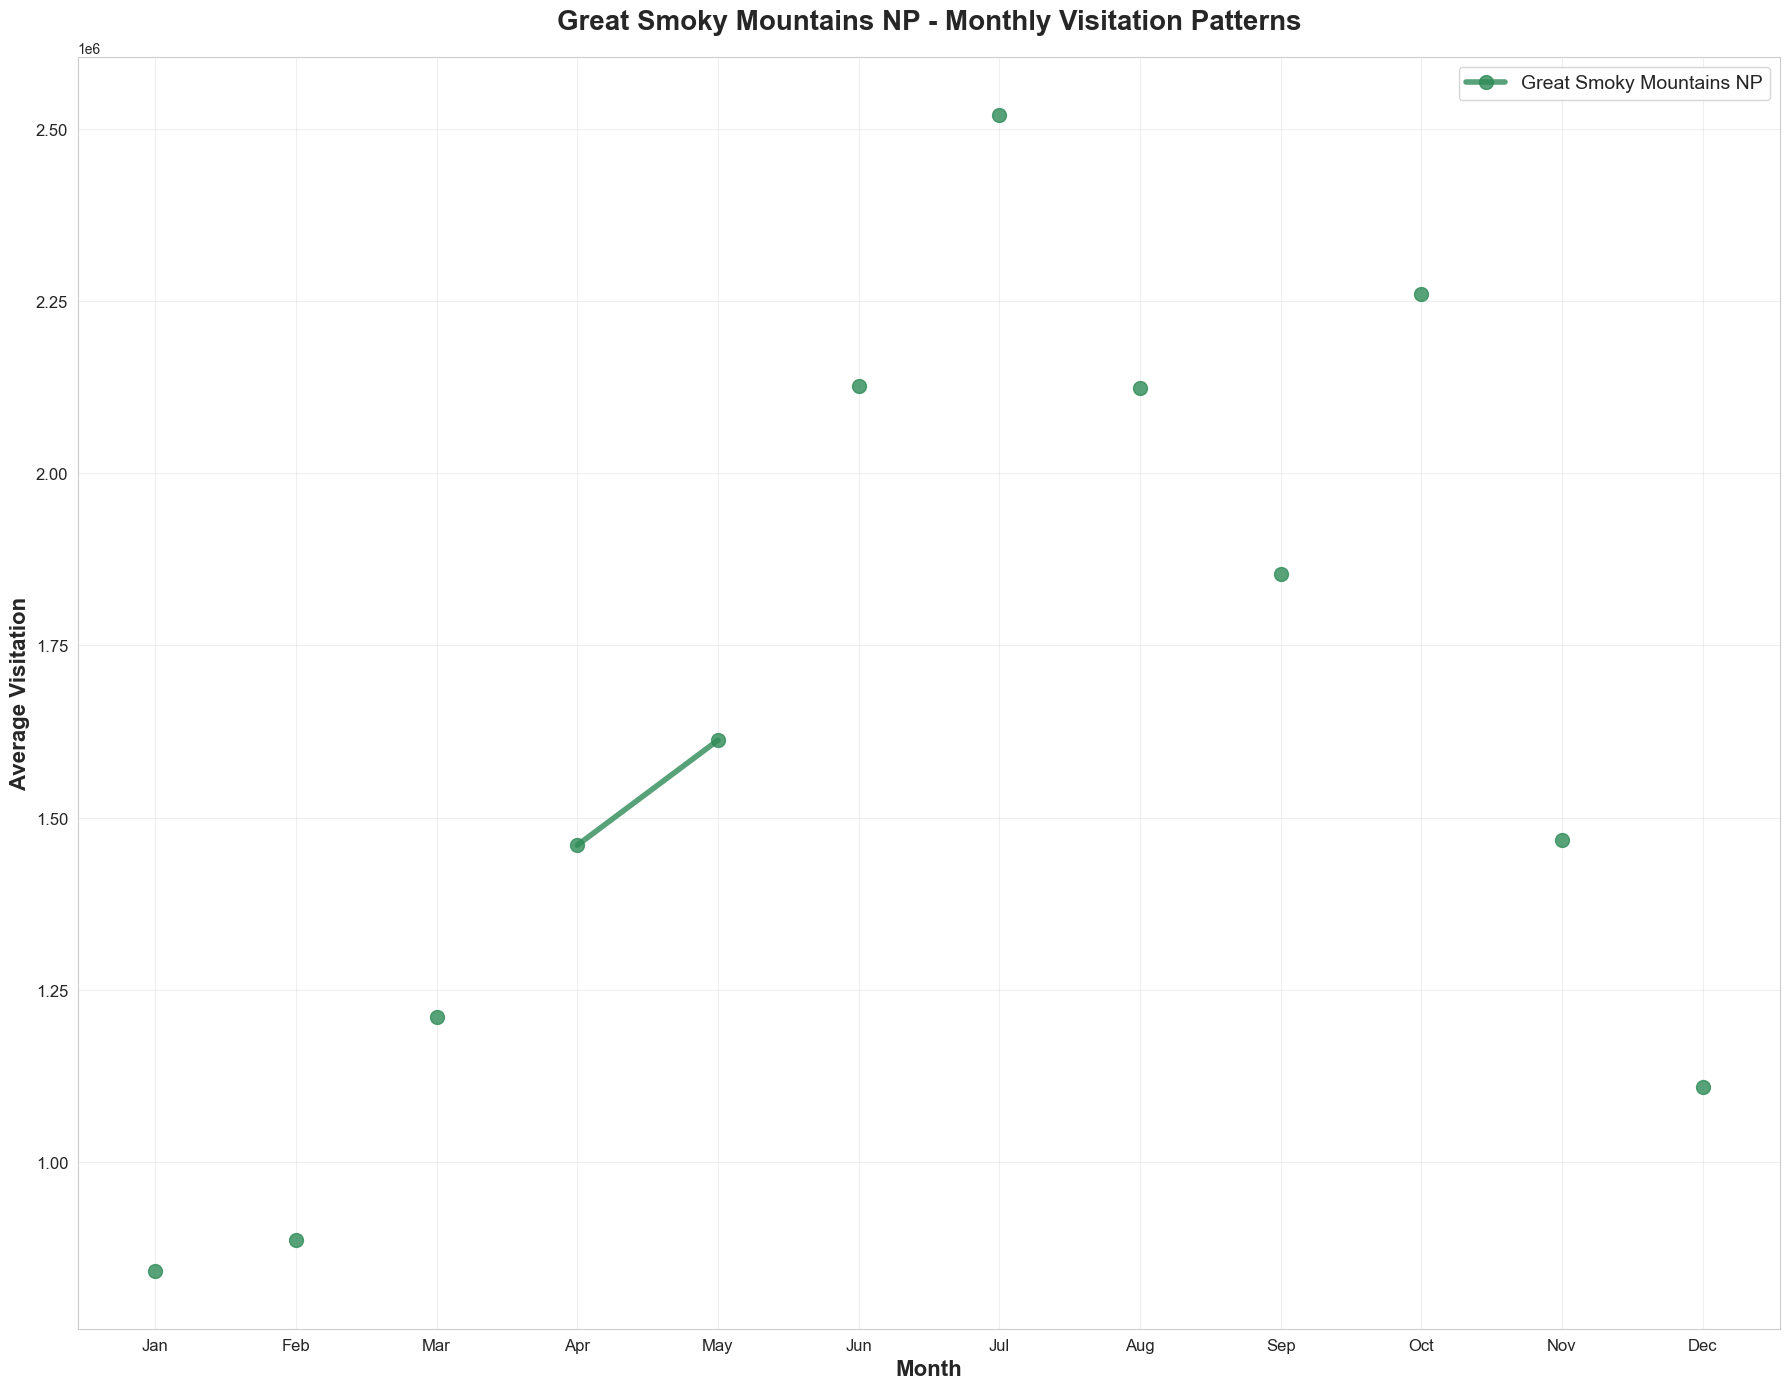

Great Smoky Mountains NP plotted separately\n


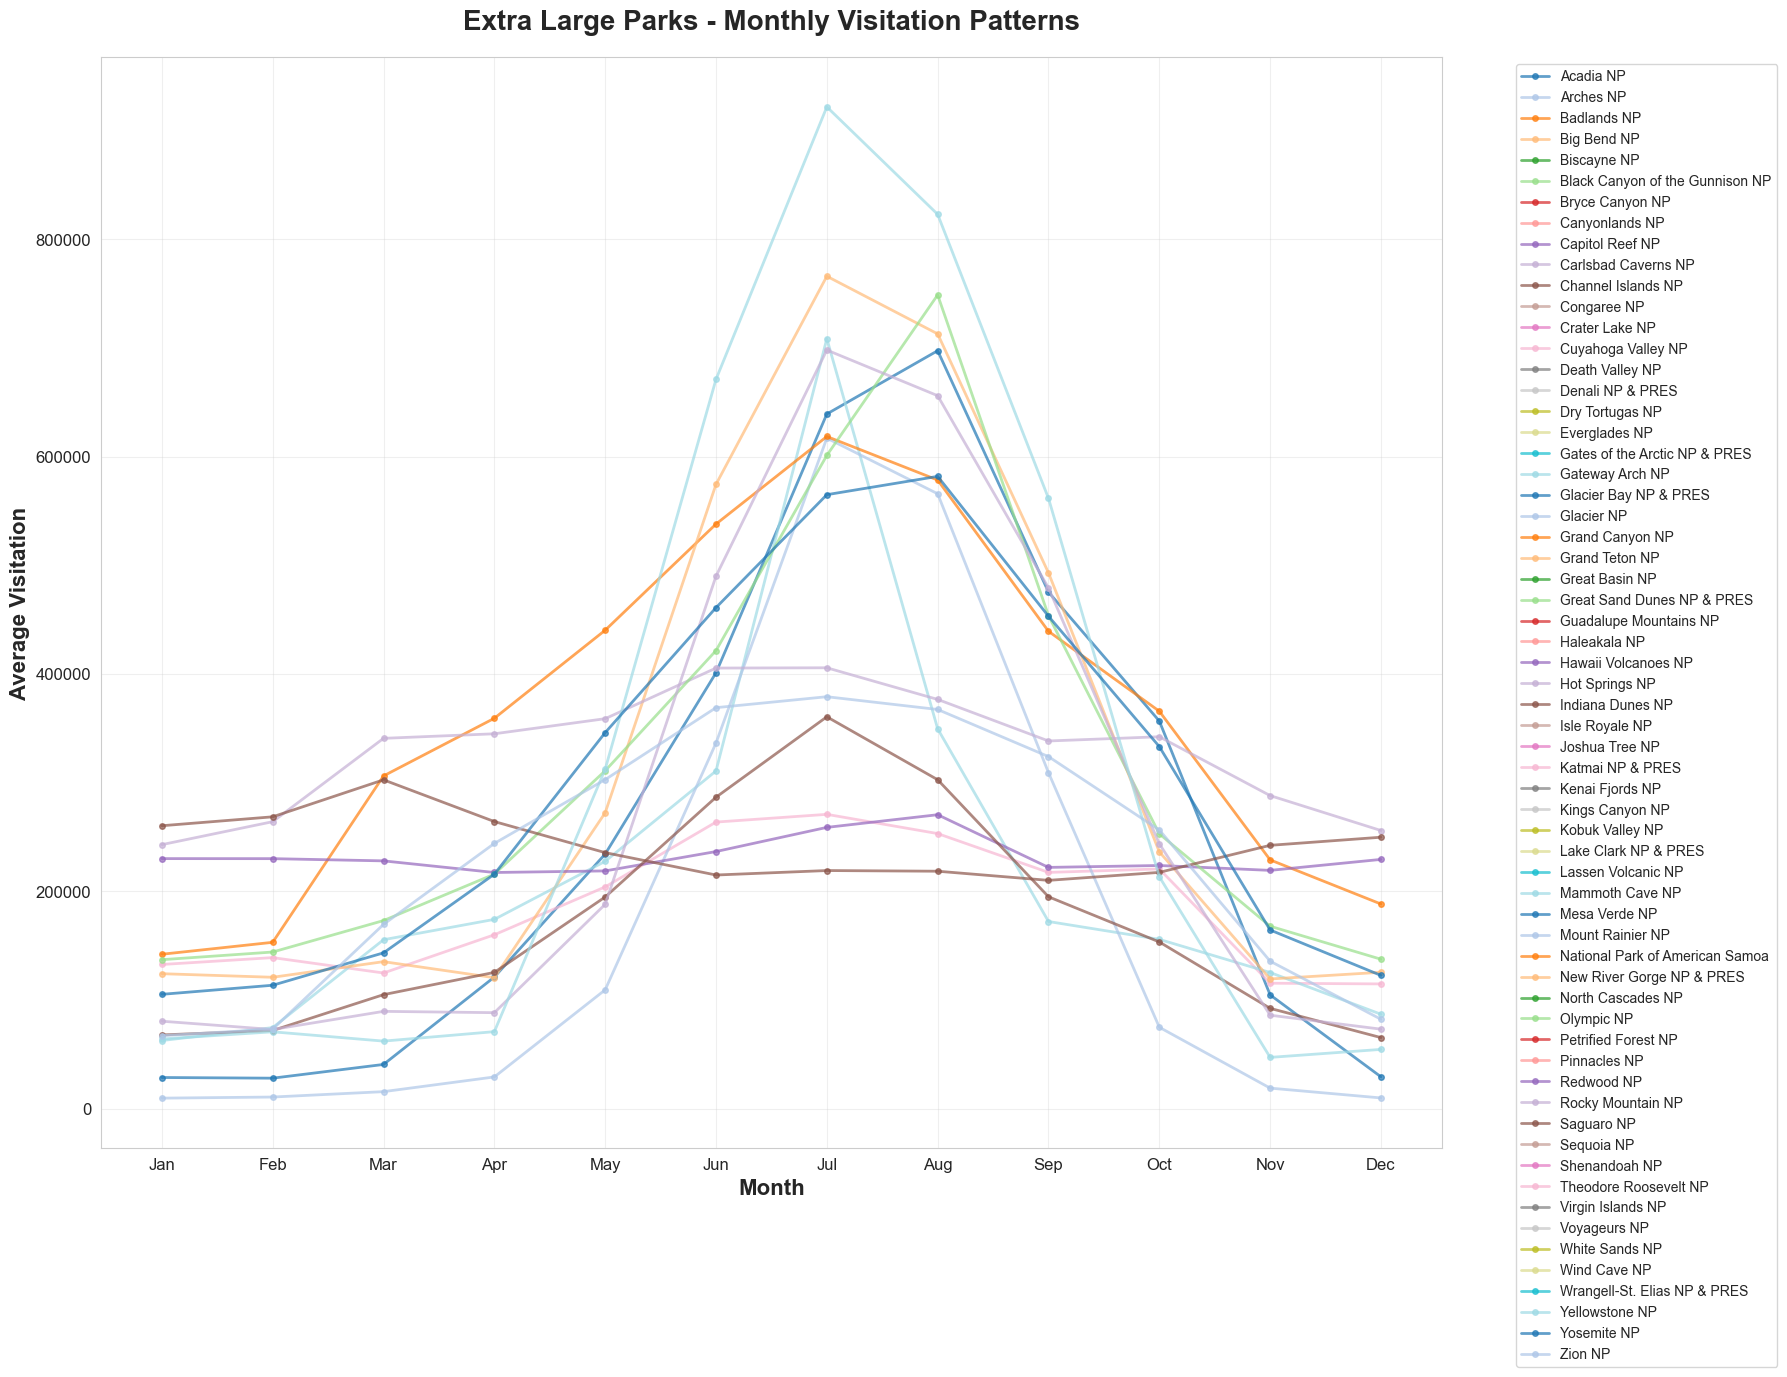

Extra Large parks: 62 parks plotted



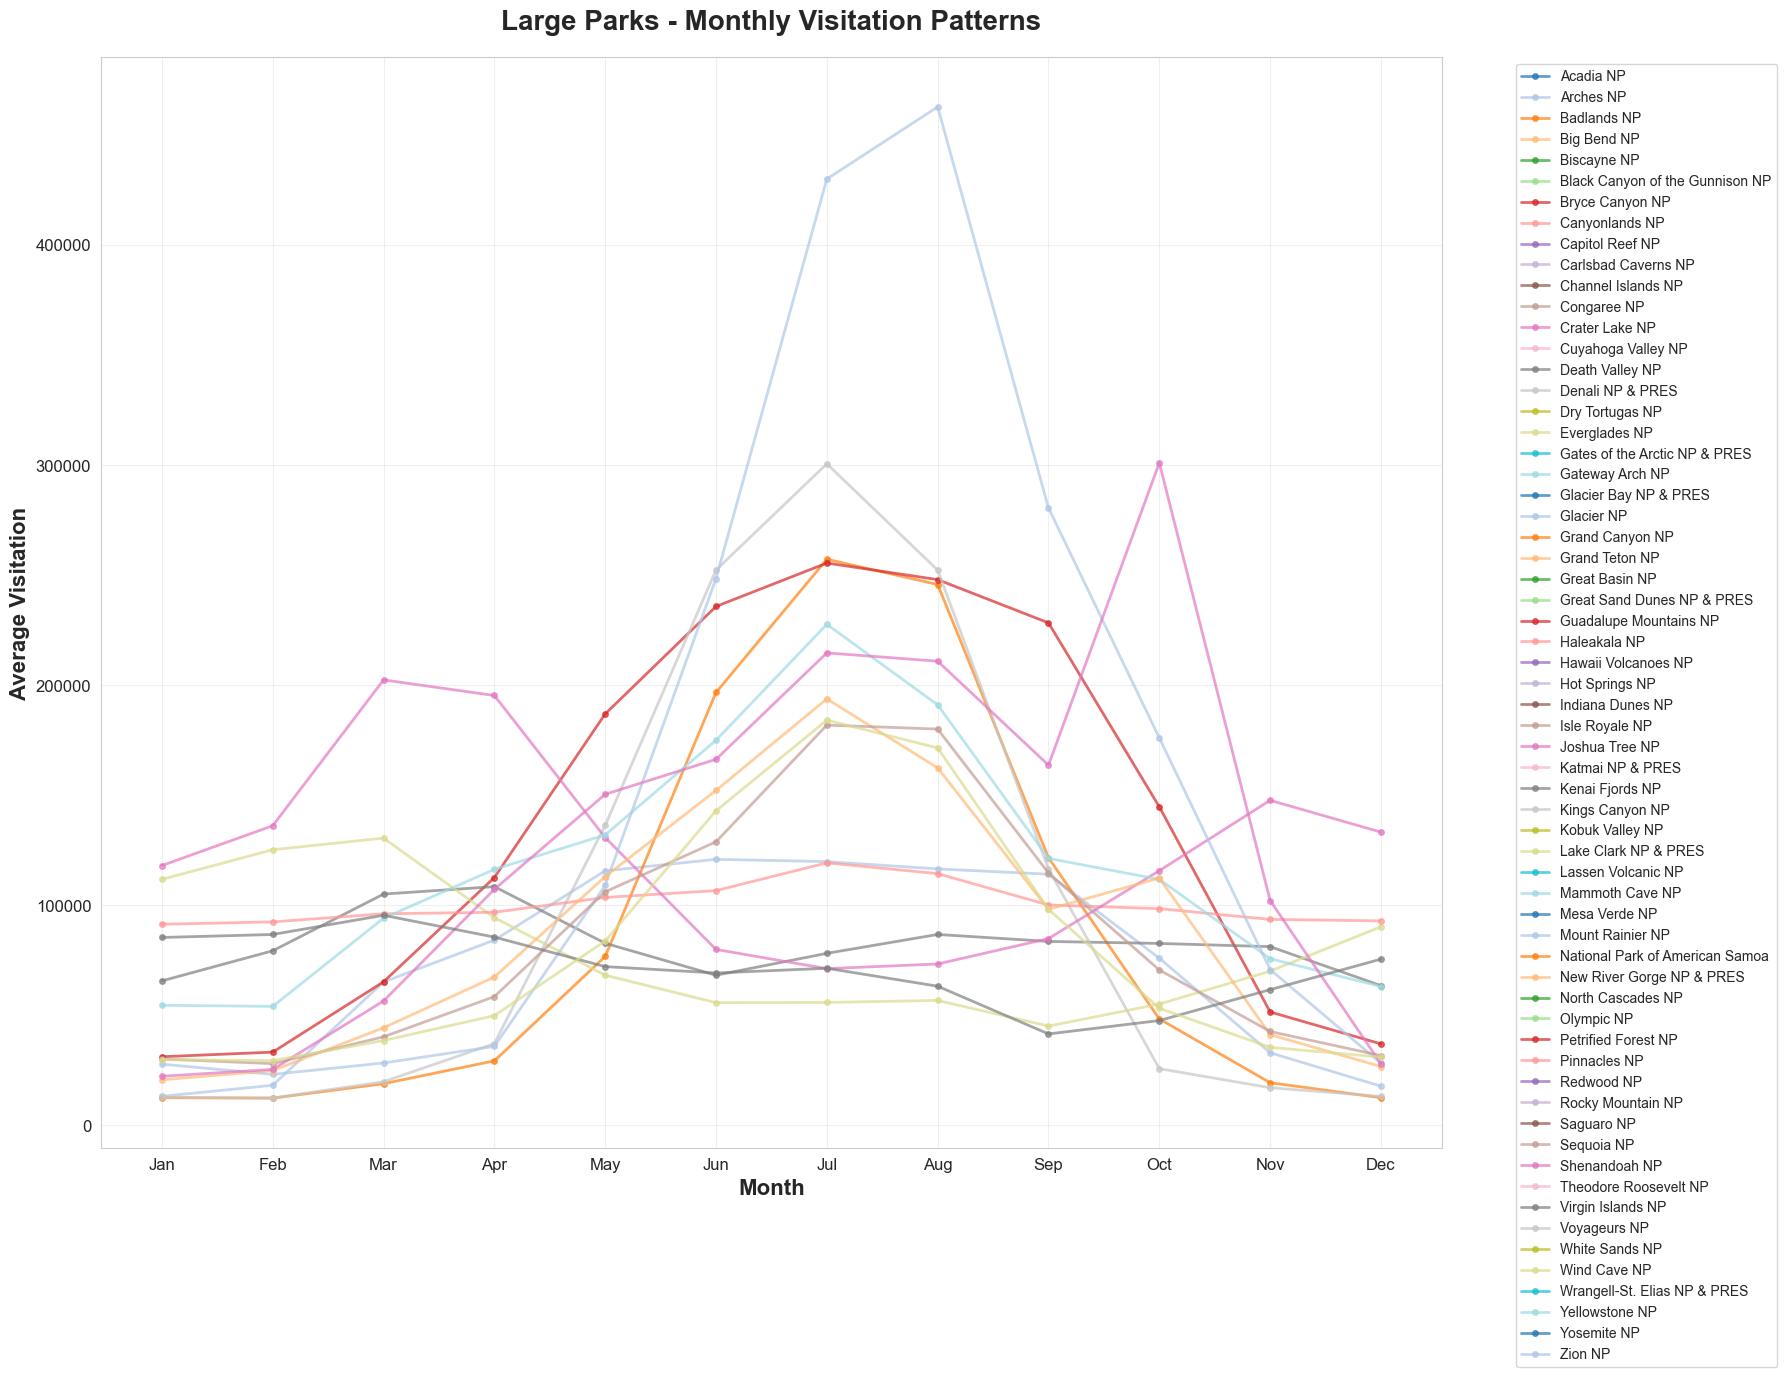

Large parks: 62 parks plotted



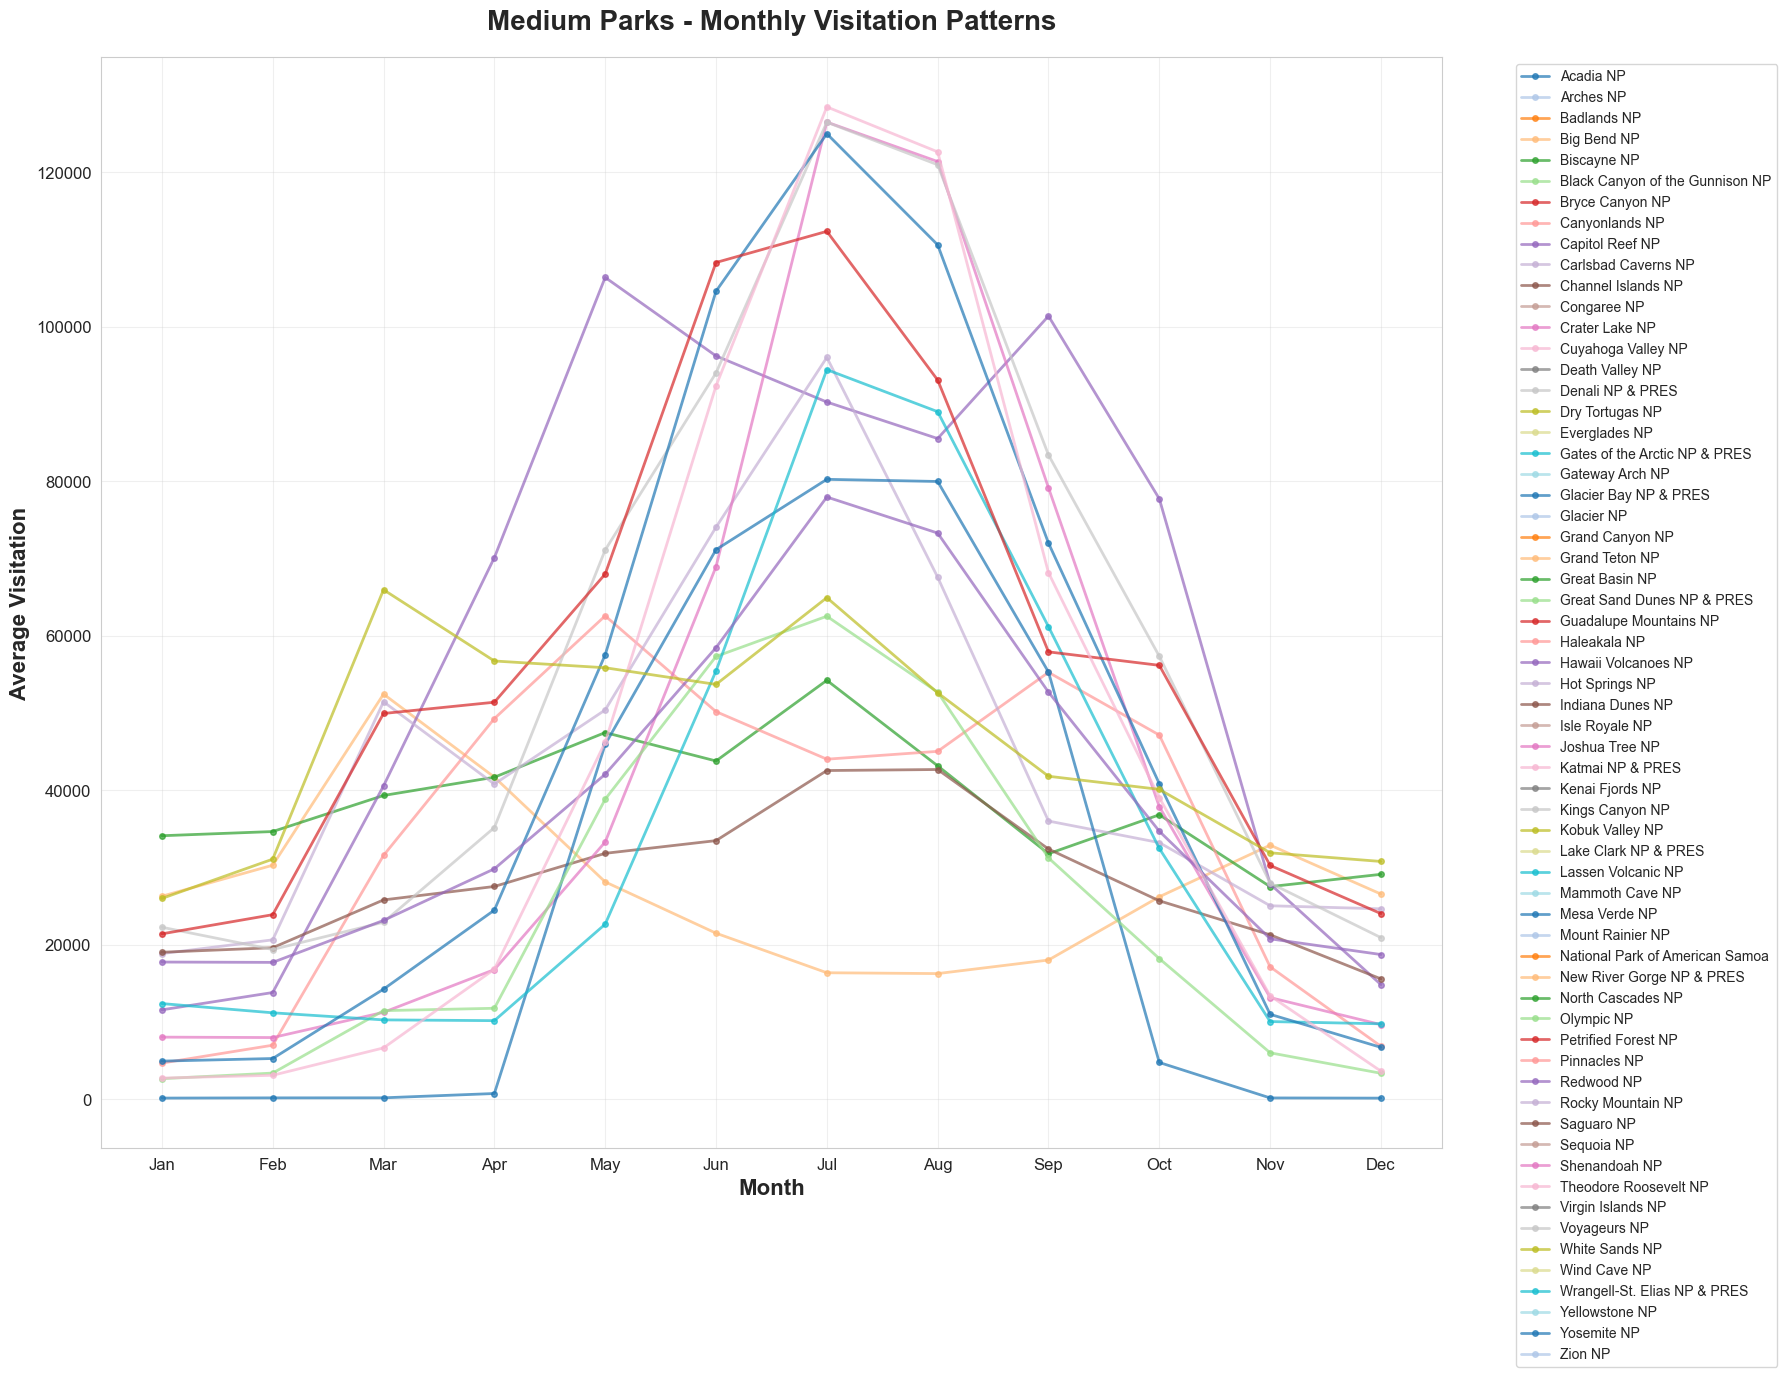

Medium parks: 62 parks plotted



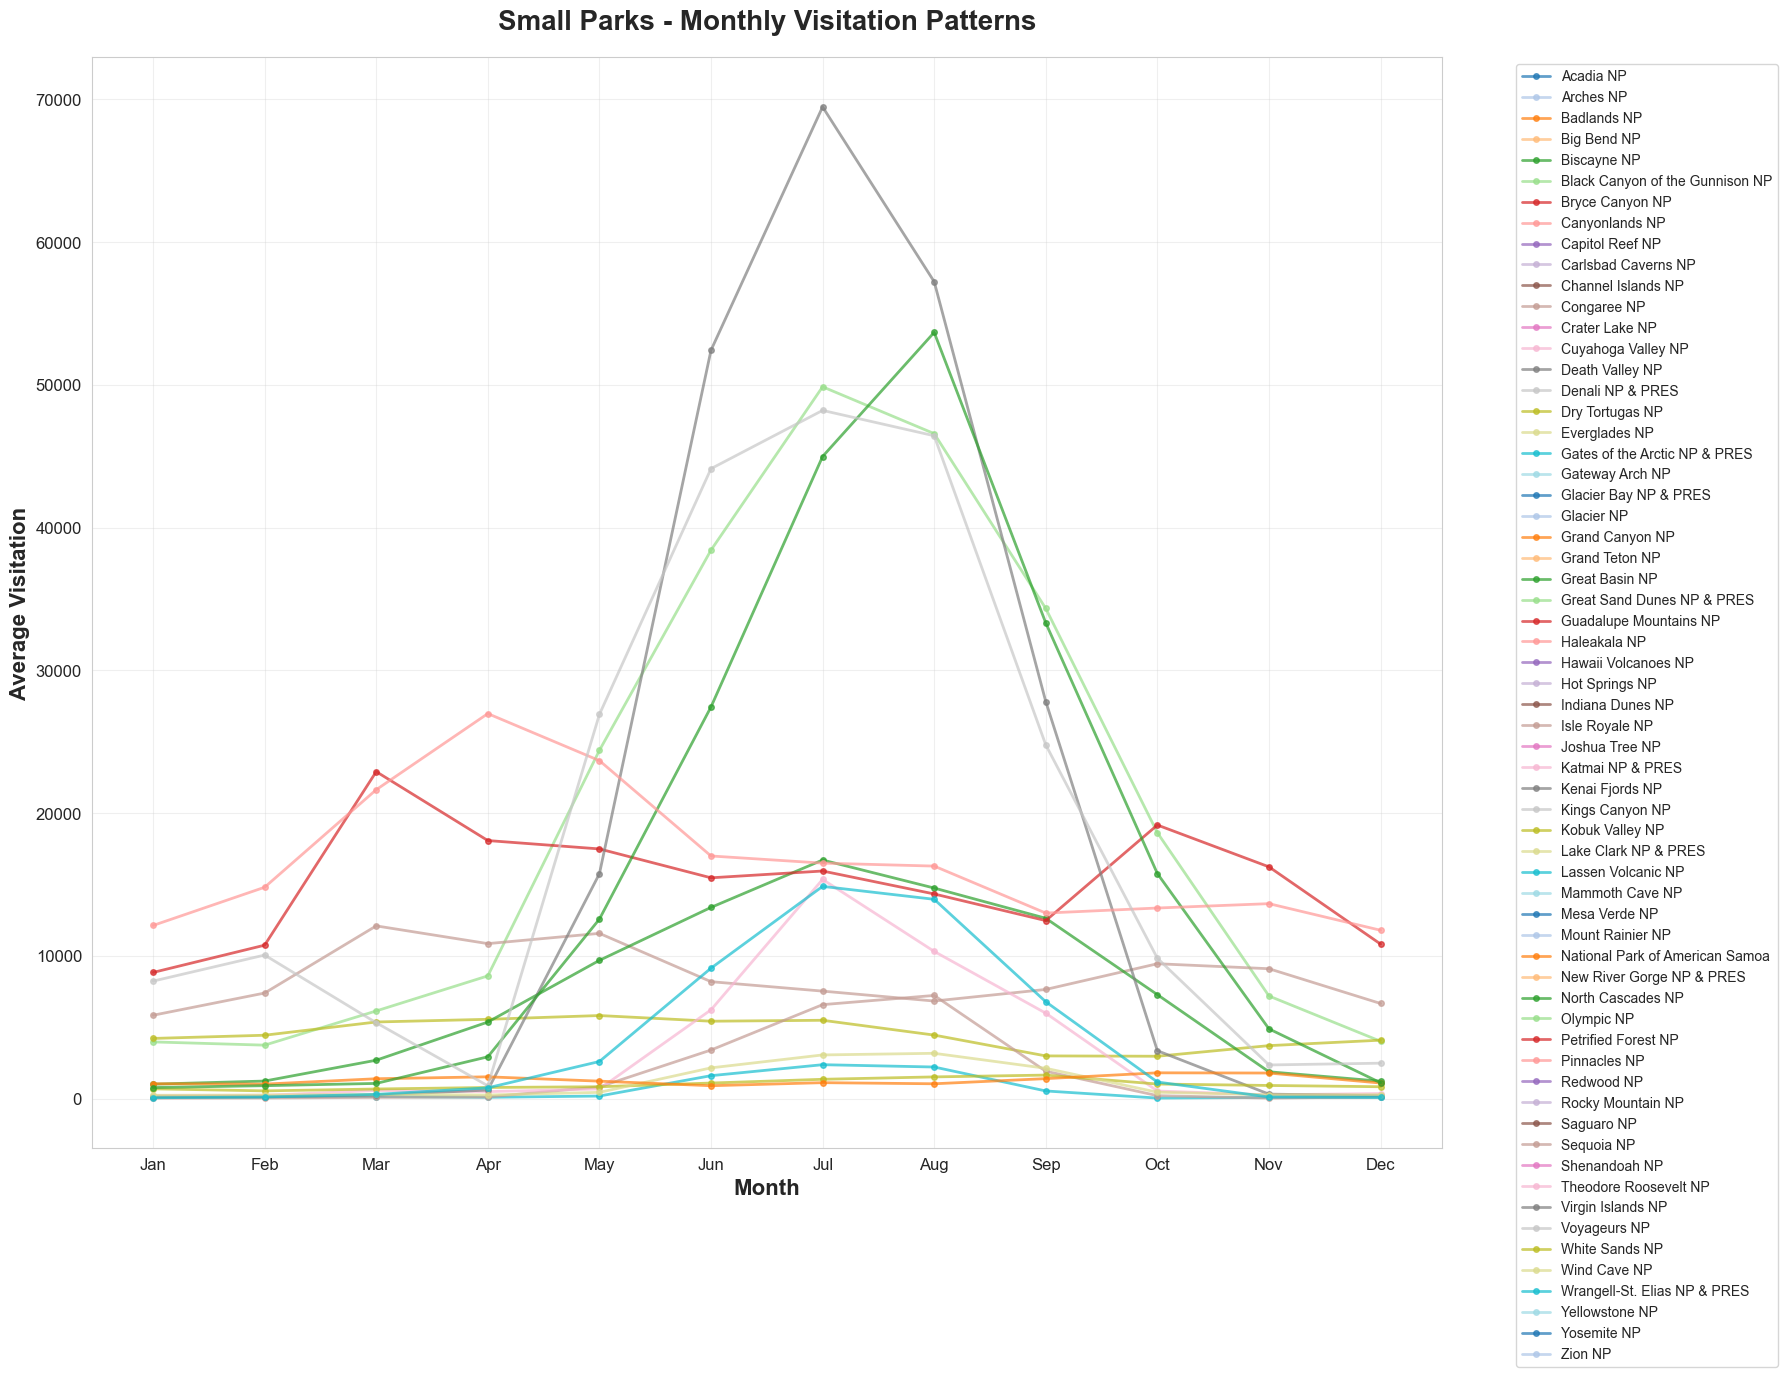

Small parks: 62 parks plotted



In [98]:
# GRAPH 1: Great Smoky Mountains NP (Separate)
gsm_data = monthly_avg[monthly_avg['ParkName'].str.contains('Great Smoky Mountains', case=False, na=False)]

if len(gsm_data) > 0:
    fig, ax = plt.subplots(figsize=(18, 14))
    
    gsm_monthly = gsm_data.sort_values('Month')
    ax.plot(gsm_monthly['Month'], gsm_monthly['AvgVisits'], 
            marker='o', linewidth=4, markersize=10, 
            label='Great Smoky Mountains NP', alpha=0.8, color='#2E8B57')
    
    # Customize the plot
    ax.set_xlabel('Month', fontsize=16, fontweight='bold')
    ax.set_ylabel('Average Visitation', fontsize=16, fontweight='bold')
    ax.set_title('Great Smoky Mountains NP - Monthly Visitation Patterns', fontsize=20, fontweight='bold', pad=20)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Great Smoky Mountains NP plotted separately\\n")

# Create 4 separate line graphs (one for each size category), excluding Great Smoky Mountains
size_categories = ['Extra Large', 'Large', 'Medium', 'Small']
colors = plt.cm.tab20(np.linspace(0, 1, 20))

for size in size_categories:
    # Create individual figure for each size category
    fig, ax = plt.subplots(figsize=(18, 14))
    
    # Filter data for this size category, excluding Great Smoky Mountains
    size_data = monthly_avg[
        (monthly_avg['SizeCategory'] == size) & 
        (~monthly_avg['ParkName'].str.contains('Great Smoky Mountains', case=False, na=False))
    ]
    parks = size_data['ParkName'].unique()
    
    # Plot each park as a line
    for i, park in enumerate(parks):
        park_data = size_data[size_data['ParkName'] == park].sort_values('Month')
        ax.plot(park_data['Month'], park_data['AvgVisits'], 
                marker='o', linewidth=2, markersize=4, 
                label=park, alpha=0.7, color=colors[i % len(colors)])
    
    # Customize the plot
    ax.set_xlabel('Month', fontsize=16, fontweight='bold')
    ax.set_ylabel('Average Visitation', fontsize=16, fontweight='bold')
    ax.set_title(f'{size} Parks - Monthly Visitation Patterns', fontsize=20, fontweight='bold', pad=20)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax.tick_params(axis='both', labelsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print(f"{size} parks: {len(parks)} parks plotted\n")


## 5. Determine Seasonality for Each Park


In [99]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

monthly_avg['Season'] = monthly_avg['Month'].apply(get_season)

# Calculate average visitation by season for each park
seasonal_avg = monthly_avg.groupby(['ParkName', 'SizeCategory', 'Season'])['AvgVisits'].mean().reset_index()

# Find peak season for each park
park_seasonality = []

for park in seasonal_avg['ParkName'].unique():
    park_data = seasonal_avg[seasonal_avg['ParkName'] == park]
    
    # Peak season
    peak_season = park_data.loc[park_data['AvgVisits'].idxmax(), 'Season']
    peak_visits = park_data['AvgVisits'].max()
    
    # Low season
    low_season = park_data.loc[park_data['AvgVisits'].idxmin(), 'Season']
    low_visits = park_data['AvgVisits'].min()
    
    # Seasonal variation
    if low_visits > 0:
        variation_pct = ((peak_visits - low_visits) / low_visits) * 100
    else:
        variation_pct = np.inf
    
    # Size category
    size_cat = park_data['SizeCategory'].iloc[0]
    
    park_seasonality.append({
        'ParkName': park,
        'SizeCategory': size_cat,
        'PeakSeason': peak_season,
        'PeakVisits': peak_visits,
        'LowSeason': low_season,
        'LowVisits': low_visits,
        'SeasonalVariation%': variation_pct
    })

seasonality_df = pd.DataFrame(park_seasonality)
seasonality_df = seasonality_df.sort_values('PeakVisits', ascending=False)

print(f"Seasonality analysis completed for {len(seasonality_df)} parks\\n")
seasonality_df.head(20)


Seasonality analysis completed for 63 parks\n


,ParkName,SizeCategory,PeakSeason,PeakVisits,LowSeason,LowVisits,SeasonalVariation%
26,Great Smoky Mountains NP,Small,Summer,2.256696e+06,Winter,945888.021739,138.579582
60,Yellowstone NP,Small,Summer,8.052259e+05,Winter,63007.239130,1177.989578
23,Grand Teton NP,Small,Summer,6.843959e+05,Winter,123414.449275,454.550832
50,Rocky Mountain NP,Small,Summer,6.146282e+05,Winter,75365.355072,715.531518
46,Olympic NP,Small,Summer,5.903989e+05,Winter,139454.565217,323.362931
0,Acadia NP,Small,Summer,5.791790e+05,Winter,28541.144928,1929.277285
22,Grand Canyon NP,Small,Summer,5.782205e+05,Winter,161038.514493,259.057278
61,Yosemite NP,Small,Summer,5.358635e+05,Winter,113672.478261,371.410030
21,Glacier NP,Small,Summer,5.063445e+05,Winter,9951.521739,4988.111570
19,Gateway Arch NP,Small,Summer,4.561998e+05,Winter,74592.753623,511.587334


### Peak Season Distribution


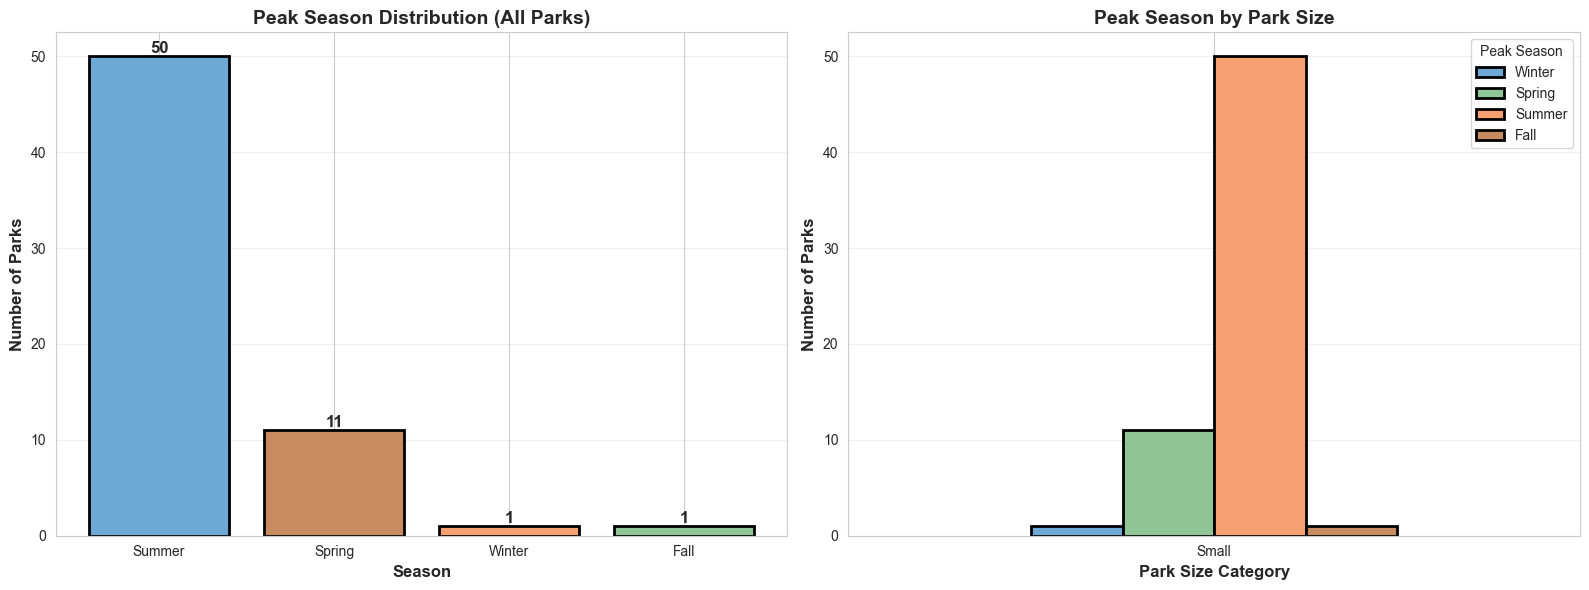

\nPeak Season Summary:
PeakSeason
Summer    50
Spring    11
Winter     1
Fall       1
Name: count, dtype: int64


In [100]:
# Visualize peak season distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overall peak season distribution
peak_counts = seasonality_df['PeakSeason'].value_counts()
axes[0].bar(peak_counts.index, peak_counts.values, 
            color=['#6EA8D4', '#C88B5F', '#F7A072', '#90C695'], edgecolor='black', linewidth=2)
axes[0].set_title('Peak Season Distribution (All Parks)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Season', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Parks', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, (season, count) in enumerate(peak_counts.items()):
    axes[0].text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Peak season by size category
peak_by_size = seasonality_df.groupby(['SizeCategory', 'PeakSeason']).size().unstack(fill_value=0)
peak_by_size = peak_by_size[['Winter', 'Spring', 'Summer', 'Fall']]
peak_by_size.plot(kind='bar', ax=axes[1], 
                  color=['#6EA8D4', '#90C695', '#F7A072', '#C88B5F'],
                  edgecolor='black', linewidth=2)
axes[1].set_title('Peak Season by Park Size', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Park Size Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Parks', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Peak Season', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nPeak Season Summary:")
print(seasonality_df['PeakSeason'].value_counts())


## 6. Detailed Seasonality Report


In [101]:
# Print detailed seasonality report by size
print("=" * 100)
print("DETAILED SEASONALITY REPORT BY PARK SIZE")
print("=" * 100)

for size in ['Extra Large', 'Large', 'Medium', 'Small']:
    size_parks = seasonality_df[seasonality_df['SizeCategory'] == size].sort_values('PeakVisits', ascending=False)
    
    print(f"\\n\\n{'='*100}")
    print(f"{size.upper()} PARKS ({len(size_parks)} total)")
    print("=" * 100)
    print(f"{'Park Name':<50} {'Peak Season':<12} {'Peak Visits':>15} {'Low Season':<12} {'Variation %':>12}")
    print("-" * 100)
    
    for _, park in size_parks.iterrows():
        var_str = f"{park['SeasonalVariation%']:.1f}%" if park['SeasonalVariation%'] != np.inf else "N/A"
        print(f"{park['ParkName']:<50} {park['PeakSeason']:<12} {park['PeakVisits']:>15,.0f} "
              f"{park['LowSeason']:<12} {var_str:>12}")


DETAILED SEASONALITY REPORT BY PARK SIZE
\n\n====================================================================================================
EXTRA LARGE PARKS (0 total)
Park Name                                          Peak Season      Peak Visits Low Season    Variation %
----------------------------------------------------------------------------------------------------
\n\n====================================================================================================
LARGE PARKS (0 total)
Park Name                                          Peak Season      Peak Visits Low Season    Variation %
----------------------------------------------------------------------------------------------------
\n\n====================================================================================================
MEDIUM PARKS (0 total)
Park Name                                          Peak Season      Peak Visits Low Season    Variation %
---------------------------------------------------

## 7. Export Results


In [102]:
# Export seasonality results to CSV
seasonality_df.to_csv('park_seasonality_report.csv', index=False)
print("Seasonality report exported to: park_seasonality_report.csv")

# Export monthly averages
monthly_avg.to_csv('park_monthly_averages.csv', index=False)
print("Monthly averages exported to: park_monthly_averages.csv")


Seasonality report exported to: park_seasonality_report.csv
Monthly averages exported to: park_monthly_averages.csv


## 8. State Voting Patterns vs Park Visitation Changes


In [103]:
# Load presidential voting data
voting_df = pd.read_csv('Datasets/1976-2020-president.csv')

print(f"Voting data loaded: {len(voting_df)} records")
print(f"Years covered: {voting_df['year'].min()} - {voting_df['year'].max()}")
print(f"States: {voting_df['state'].nunique()}")
print(f"\nColumns: {voting_df.columns.tolist()}")
voting_df.head()


Voting data loaded: 4287 records
Years covered: 1976 - 2020
States: 51

Columns: ['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic', 'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes', 'totalvotes', 'version', 'notes', 'party_simplified']


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [104]:
# Determine winner for each state in each election
# Get only the two major parties
major_parties = voting_df[voting_df['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])]

# Calculate total votes for each party by state and year
state_party_votes = major_parties.groupby(['year', 'state', 'party_simplified'])['candidatevotes'].sum().reset_index()

# Pivot to compare Democrat vs Republican votes
state_votes_pivot = state_party_votes.pivot(index=['year', 'state'], 
                                              columns='party_simplified', 
                                              values='candidatevotes').reset_index()
state_votes_pivot.columns.name = None
state_votes_pivot = state_votes_pivot.fillna(0)

# Determine winner
state_votes_pivot['Winner'] = state_votes_pivot.apply(
    lambda row: 'DEMOCRAT' if row['DEMOCRAT'] > row['REPUBLICAN'] else 'REPUBLICAN', axis=1
)

# Calculate margin
state_votes_pivot['TotalVotes'] = state_votes_pivot['DEMOCRAT'] + state_votes_pivot['REPUBLICAN']
state_votes_pivot['DemocratPct'] = state_votes_pivot['DEMOCRAT'] / state_votes_pivot['TotalVotes'] * 100
state_votes_pivot['RepublicanPct'] = state_votes_pivot['REPUBLICAN'] / state_votes_pivot['TotalVotes'] * 100
state_votes_pivot['Margin'] = abs(state_votes_pivot['DemocratPct'] - state_votes_pivot['RepublicanPct'])

print("Sample of state voting results:")
state_votes_pivot.head(10)


Sample of state voting results:


,year,state,DEMOCRAT,REPUBLICAN,Winner,TotalVotes,DemocratPct,RepublicanPct,Margin
0,1976,ALABAMA,659170,504070,DEMOCRAT,1163240,56.666724,43.333276,13.333448
1,1976,ALASKA,44058,71555,REPUBLICAN,115613,38.108171,61.891829,23.783658
2,1976,ARIZONA,295602,418642,REPUBLICAN,714244,41.386697,58.613303,17.226606
3,1976,ARKANSAS,498604,267903,DEMOCRAT,766507,65.048851,34.951149,30.097703
4,1976,CALIFORNIA,3742284,3882244,REPUBLICAN,7624528,49.082173,50.917827,1.835655
5,1976,COLORADO,460801,584278,REPUBLICAN,1045079,44.092456,55.907544,11.815088
6,1976,CONNECTICUT,647895,719261,REPUBLICAN,1367156,47.389983,52.610017,5.220033
7,1976,DELAWARE,122461,109780,DEMOCRAT,232241,52.730138,47.269862,5.460276
8,1976,DISTRICT OF COLUMBIA,137818,27873,DEMOCRAT,165691,83.177722,16.822278,66.355445
9,1976,FLORIDA,1636000,1469531,DEMOCRAT,3105531,52.680202,47.319798,5.360404


In [105]:
# Classify states as Red, Blue, or Swing based on voting history
# Count how many times each state voted for each party
state_voting_summary = state_votes_pivot.groupby('state').agg({
    'Winner': lambda x: (x == 'REPUBLICAN').sum(),  # Count Republican wins
    'year': 'count'  # Total elections
}).reset_index()
state_voting_summary.columns = ['State', 'RepublicanWins', 'TotalElections']
state_voting_summary['DemocratWins'] = state_voting_summary['TotalElections'] - state_voting_summary['RepublicanWins']
state_voting_summary['RepublicanPct'] = state_voting_summary['RepublicanWins'] / state_voting_summary['TotalElections'] * 100

# Get state abbreviations from the original voting data
state_abbrev_mapping = voting_df[['state', 'state_po']].drop_duplicates()
state_voting_summary = state_voting_summary.merge(state_abbrev_mapping, left_on='State', right_on='state', how='left')
state_voting_summary = state_voting_summary.rename(columns={'state_po': 'StateAbbrev'})
state_voting_summary = state_voting_summary.drop('state', axis=1)

# Classify states:
# Red: >= 70% Republican wins
# Blue: <= 30% Republican wins (i.e., >= 70% Democrat wins)
# Swing: Between 30% and 70%
def classify_state(pct):
    if pct >= 70:
        return 'Red'
    elif pct <= 30:
        return 'Blue'
    else:
        return 'Swing'

state_voting_summary['StateCategory'] = state_voting_summary['RepublicanPct'].apply(classify_state)

# Display classification
print("State Classification by Voting History (1976-2020):")
print(f"Red States: {(state_voting_summary['StateCategory'] == 'Red').sum()}")
print(f"Blue States: {(state_voting_summary['StateCategory'] == 'Blue').sum()}")
print(f"Swing States: {(state_voting_summary['StateCategory'] == 'Swing').sum()}")
print("\nBreakdown by category:")
for category in ['Red', 'Blue', 'Swing']:
    states = state_voting_summary[state_voting_summary['StateCategory'] == category]['State'].tolist()
    print(f"\n{category} States ({len(states)}): {', '.join(sorted(states))}")

state_voting_summary.head()


State Classification by Voting History (1976-2020):
Red States: 22
Blue States: 11
Swing States: 18

Breakdown by category:

Red States (22): ALABAMA, ALASKA, ARIZONA, ARKANSAS, IDAHO, INDIANA, KANSAS, KENTUCKY, LOUISIANA, MISSISSIPPI, MISSOURI, MONTANA, NEBRASKA, NORTH CAROLINA, NORTH DAKOTA, OKLAHOMA, SOUTH CAROLINA, SOUTH DAKOTA, TENNESSEE, TEXAS, UTAH, WYOMING

Blue States (11): DELAWARE, DISTRICT OF COLUMBIA, HAWAII, MARYLAND, MASSACHUSETTS, MINNESOTA, NEW YORK, OREGON, RHODE ISLAND, WASHINGTON, WISCONSIN

Swing States (18): CALIFORNIA, COLORADO, CONNECTICUT, FLORIDA, GEORGIA, ILLINOIS, IOWA, MAINE, MICHIGAN, NEVADA, NEW HAMPSHIRE, NEW JERSEY, NEW MEXICO, OHIO, PENNSYLVANIA, VERMONT, VIRGINIA, WEST VIRGINIA


,State,RepublicanWins,TotalElections,DemocratWins,RepublicanPct,StateAbbrev,StateCategory
0,ALABAMA,11,12,1,91.666667,AL,Red
1,ALASKA,12,12,0,100.000000,AK,Red
2,ARIZONA,10,12,2,83.333333,AZ,Red
3,ARKANSAS,9,12,3,75.000000,AR,Red
4,CALIFORNIA,4,12,8,33.333333,CA,Swing


In [106]:
# Merge state voting classification with park data
# Park data uses state abbreviations (e.g., 'ME', 'CA')
# Voting summary now has StateAbbrev column from the state_po field
df_with_voting = df.merge(
    state_voting_summary[['StateAbbrev', 'StateCategory', 'RepublicanPct']], 
    left_on='State', 
    right_on='StateAbbrev', 
    how='left'
)

print(f"Parks by state voting category:")
park_state_summary = df_with_voting.groupby('StateCategory')['ParkName'].nunique().reset_index()
park_state_summary.columns = ['StateCategory', 'NumberOfParks']
print(park_state_summary)
print(f"\nParks with no state category (likely territories): {df_with_voting['StateCategory'].isna().sum()}")

# Show sample of merged data
print("\nSample of merged data:")
df_with_voting[['ParkName', 'State', 'StateCategory', 'RepublicanPct']].drop_duplicates().head(10)


Parks by state voting category:
  StateCategory  NumberOfParks
0          Blue              7
1           Red             30
2         Swing             24

Parks with no state category (likely territories): 804

Sample of merged data:


,ParkName,State,StateCategory,RepublicanPct
0,Acadia NP,ME,Swing,33.333333
552,Arches NP,UT,Red,100.000000
1104,Badlands NP,SD,Red,100.000000
1656,Big Bend NP,TX,Red,91.666667
2208,Biscayne NP,FL,Swing,66.666667
2760,Black Canyon of the Gunnison NP,CO,Swing,58.333333
3312,Bryce Canyon NP,UT,Red,100.000000
3864,Canyonlands NP,UT,Red,100.000000
4416,Capitol Reef NP,UT,Red,100.000000
4968,Carlsbad Caverns NP,NM,Swing,41.666667


In [107]:
# Calculate visitation changes over time by state
# Group by state and year to get total annual visitation
state_year_visits = df_with_voting.groupby(['State', 'StateCategory', 'Year'])['TotalVisits'].sum().reset_index()

# Calculate changes for different time periods
# 1. Overall trend (from earliest to latest year for each state)
# 2. Recent changes (2015-2024 vs 2000-2009)

def calculate_visitation_change(group):
    """Calculate percentage change in visitation for a state"""
    group = group.sort_values('Year')
    
    # Overall change (first 5 years vs last 5 years)
    years = sorted(group['Year'].unique())
    if len(years) < 10:
        return None
    
    early_years = years[:5]
    late_years = years[-5:]
    
    early_avg = group[group['Year'].isin(early_years)]['TotalVisits'].mean()
    late_avg = group[group['Year'].isin(late_years)]['TotalVisits'].mean()
    
    if early_avg == 0:
        return None
    
    pct_change = ((late_avg - early_avg) / early_avg) * 100
    
    return {
        'EarlyPeriod': f"{min(early_years)}-{max(early_years)}",
        'LatePeriod': f"{min(late_years)}-{max(late_years)}",
        'EarlyAvg': early_avg,
        'LateAvg': late_avg,
        'PercentChange': pct_change,
        'AbsoluteChange': late_avg - early_avg
    }

# Calculate for each state
state_changes = []
for state in state_year_visits['State'].unique():
    state_data = state_year_visits[state_year_visits['State'] == state]
    change_data = calculate_visitation_change(state_data)
    
    if change_data:
        state_category = state_data['StateCategory'].iloc[0]
        state_changes.append({
            'State': state,
            'StateCategory': state_category,
            **change_data
        })

state_changes_df = pd.DataFrame(state_changes)

print("Visitation Changes by State:")
print(f"Total states with data: {len(state_changes_df)}")
print(f"\nSummary by State Category:")
summary = state_changes_df.groupby('StateCategory').agg({
    'PercentChange': ['mean', 'median', 'std'],
    'State': 'count'
}).round(2)
print(summary)

print("\nTop 10 states with largest visitation increase:")
print(state_changes_df.nlargest(10, 'PercentChange')[['State', 'StateCategory', 'PercentChange']].to_string(index=False))

print("\nTop 10 states with largest visitation decrease:")
print(state_changes_df.nsmallest(10, 'PercentChange')[['State', 'StateCategory', 'PercentChange']].to_string(index=False))

state_changes_df.head()


Visitation Changes by State:
Total states with data: 28

Summary by State Category:
              PercentChange                State
                       mean median     std count
StateCategory                                   
Blue                  19.07  17.07   10.94     4
Red                  131.24  76.57  248.24    14
Swing                120.13  55.76  151.22    10

Top 10 states with largest visitation increase:
State StateCategory  PercentChange
   SC           Red     921.376995
   WV         Swing     354.924983
   NV         Swing     334.313312
   OH         Swing     315.167519
   UT           Red     305.006612
   AK           Red     200.828815
   AZ           Red     133.569178
   TX           Red     100.653745
   TN           Red      93.099300
   WY           Red      86.797188

Top 10 states with largest visitation decrease:
State StateCategory  PercentChange
   KY           Red     -57.798326
   AR           Red     -54.245439
   MO           Red     -32.203122

,State,StateCategory,EarlyPeriod,LatePeriod,EarlyAvg,LateAvg,PercentChange,AbsoluteChange
0,AK,Red,1979-1983,2020-2024,700831.6,2108303.4,200.828815,1407471.8
1,AR,Red,1979-1983,2020-2024,5193898.8,2376445.6,-54.245439,-2817453.2
2,AZ,Red,1979-1983,2020-2024,4129550.0,9645356.0,133.569178,5515806.0
3,CA,Swing,1979-1983,2020-2024,6828921.4,10874564.2,59.242779,4045642.8
4,CO,Swing,1979-1983,2020-2024,3681402.8,5376143.2,46.035180,1694740.4


In [108]:
# Correlation Analysis: State Voting Pattern vs Visitation Change
from scipy import stats

# Remove rows with missing state categories (territories)
correlation_df = state_changes_df.dropna(subset=['StateCategory'])

# Merge with Republican percentage for more granular analysis
correlation_df = correlation_df.merge(
    state_voting_summary[['StateAbbrev', 'RepublicanPct']], 
    left_on='State', 
    right_on='StateAbbrev', 
    how='left'
)

print("=== CORRELATION ANALYSIS ===\n")

# 1. Correlation between Republican voting percentage and visitation change
valid_data = correlation_df.dropna(subset=['RepublicanPct', 'PercentChange'])
if len(valid_data) > 2:
    corr_coef, p_value = stats.pearsonr(valid_data['RepublicanPct'], valid_data['PercentChange'])
    print(f"Pearson Correlation: Republican Voting % vs. Visitation Change %")
    print(f"  Correlation coefficient: {corr_coef:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")
    
    # Interpretation
    if abs(corr_coef) < 0.3:
        strength = "weak"
    elif abs(corr_coef) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"
    
    direction = "positive" if corr_coef > 0 else "negative"
    
    print(f"  Interpretation: {strength.capitalize()} {direction} correlation")
    if corr_coef > 0:
        print(f"  States that vote more Republican tend to have larger increases in park visitation.")
    else:
        print(f"  States that vote more Democratic tend to have larger increases in park visitation.")

print("\n" + "="*60 + "\n")

# 2. Compare visitation changes across state categories (Red, Blue, Swing)
print("Visitation Change by State Political Category:\n")
for category in ['Red', 'Blue', 'Swing']:
    cat_data = correlation_df[correlation_df['StateCategory'] == category]
    if len(cat_data) > 0:
        print(f"{category} States:")
        print(f"  Count: {len(cat_data)}")
        print(f"  Mean change: {cat_data['PercentChange'].mean():.2f}%")
        print(f"  Median change: {cat_data['PercentChange'].median():.2f}%")
        print(f"  Std deviation: {cat_data['PercentChange'].std():.2f}%")
        print()

# 3. Statistical test: ANOVA to see if there's significant difference between categories
red_changes = correlation_df[correlation_df['StateCategory'] == 'Red']['PercentChange'].dropna()
blue_changes = correlation_df[correlation_df['StateCategory'] == 'Blue']['PercentChange'].dropna()
swing_changes = correlation_df[correlation_df['StateCategory'] == 'Swing']['PercentChange'].dropna()

if len(red_changes) > 0 and len(blue_changes) > 0 and len(swing_changes) > 0:
    f_stat, p_value_anova = stats.f_oneway(red_changes, blue_changes, swing_changes)
    print(f"ANOVA Test: Are visitation changes different across Red/Blue/Swing states?")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value_anova:.4f}")
    print(f"  Significant difference: {'Yes' if p_value_anova < 0.05 else 'No'}")
    
print("\n" + "="*60)

correlation_df[['State', 'StateCategory', 'RepublicanPct', 'PercentChange']].head(10)


=== CORRELATION ANALYSIS ===

Pearson Correlation: Republican Voting % vs. Visitation Change %
  Correlation coefficient: 0.2387
  P-value: 0.2212
  Significant: No
  Interpretation: Weak positive correlation
  States that vote more Republican tend to have larger increases in park visitation.


Visitation Change by State Political Category:

Red States:
  Count: 14
  Mean change: 131.24%
  Median change: 76.57%
  Std deviation: 248.24%

Blue States:
  Count: 4
  Mean change: 19.07%
  Median change: 17.07%
  Std deviation: 10.94%

Swing States:
  Count: 10
  Mean change: 120.13%
  Median change: 55.76%
  Std deviation: 151.22%

ANOVA Test: Are visitation changes different across Red/Blue/Swing states?
  F-statistic: 0.5010
  P-value: 0.6119
  Significant difference: No



,State,StateCategory,RepublicanPct,PercentChange
0,AK,Red,100.000000,200.828815
1,AR,Red,75.000000,-54.245439
2,AZ,Red,83.333333,133.569178
3,CA,Swing,33.333333,59.242779
4,CO,Swing,58.333333,46.035180
5,FL,Swing,66.666667,52.274122
6,HI,Blue,8.333333,23.186462
7,IN,Red,91.666667,66.343878
8,KY,Red,75.000000,-57.798326
9,ME,Swing,33.333333,4.816783


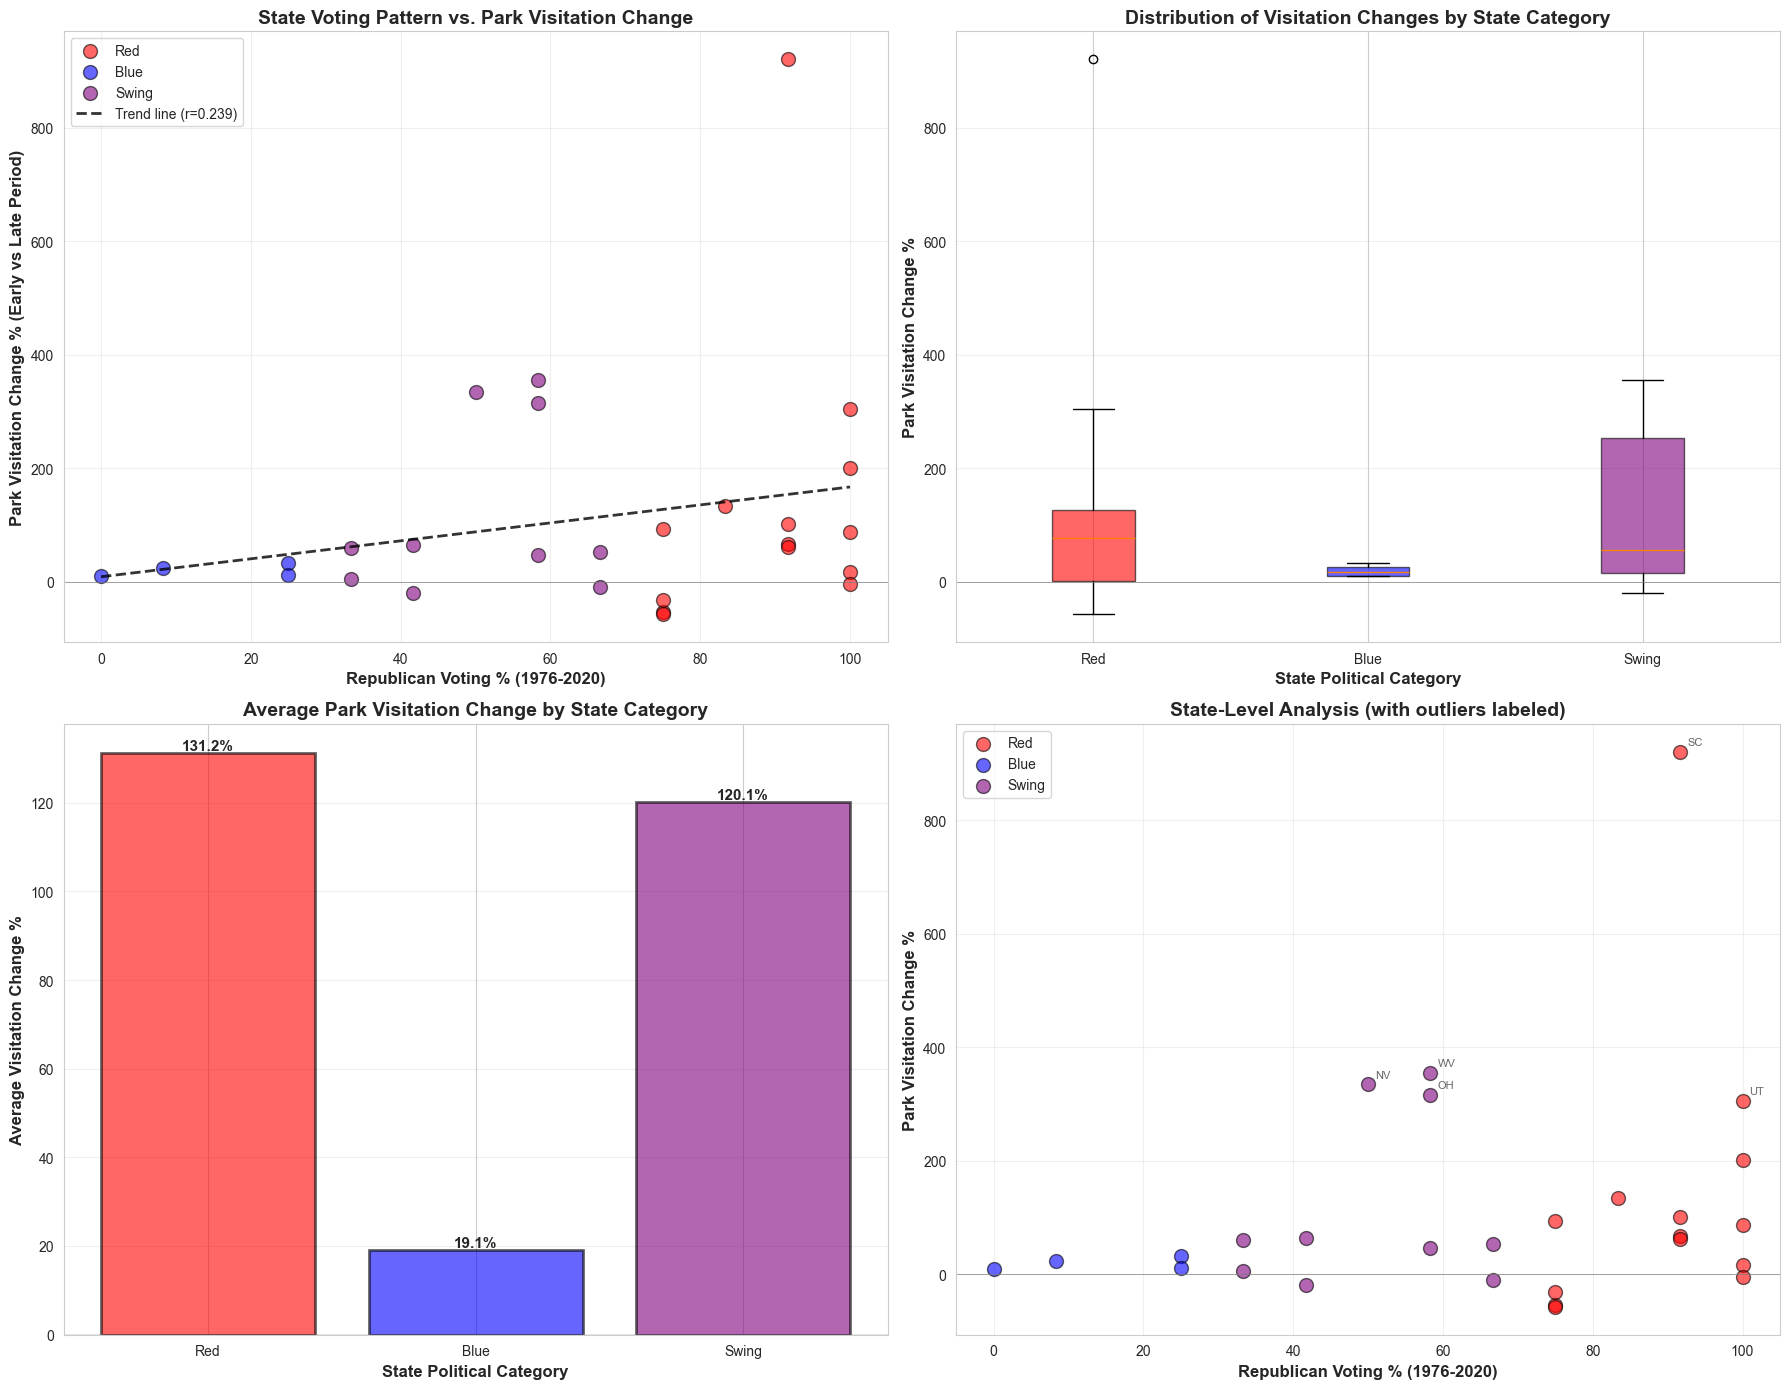

In [109]:
# Visualization 1: Scatter plot of Republican voting % vs Visitation change
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Scatter plot with regression line
ax1 = axes[0, 0]
colors = {'Red': 'red', 'Blue': 'blue', 'Swing': 'purple'}
for category in ['Red', 'Blue', 'Swing']:
    cat_data = correlation_df[correlation_df['StateCategory'] == category]
    ax1.scatter(cat_data['RepublicanPct'], cat_data['PercentChange'], 
               c=colors[category], label=category, s=100, alpha=0.6, edgecolors='black')

# Add regression line
if len(valid_data) > 2:
    z = np.polyfit(valid_data['RepublicanPct'], valid_data['PercentChange'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(valid_data['RepublicanPct'].min(), valid_data['RepublicanPct'].max(), 100)
    ax1.plot(x_line, p(x_line), "k--", alpha=0.8, linewidth=2, label=f'Trend line (r={corr_coef:.3f})')

ax1.set_xlabel('Republican Voting % (1976-2020)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Park Visitation Change % (Early vs Late Period)', fontsize=12, fontweight='bold')
ax1.set_title('State Voting Pattern vs. Park Visitation Change', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Plot 2: Box plot by state category
ax2 = axes[0, 1]
categories = ['Red', 'Blue', 'Swing']
data_for_box = [correlation_df[correlation_df['StateCategory'] == cat]['PercentChange'].dropna() 
                for cat in categories]
bp = ax2.boxplot(data_for_box, labels=categories, patch_artist=True)
for patch, category in zip(bp['boxes'], categories):
    patch.set_facecolor(colors[category])
    patch.set_alpha(0.6)
ax2.set_ylabel('Park Visitation Change %', fontsize=12, fontweight='bold')
ax2.set_xlabel('State Political Category', fontsize=12, fontweight='bold')
ax2.set_title('Distribution of Visitation Changes by State Category', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Plot 3: Bar chart showing mean changes
ax3 = axes[1, 0]
mean_changes = correlation_df.groupby('StateCategory')['PercentChange'].mean().reindex(['Red', 'Blue', 'Swing'])
bars = ax3.bar(mean_changes.index, mean_changes.values, color=[colors[cat] for cat in mean_changes.index], 
               alpha=0.6, edgecolor='black', linewidth=2)
ax3.set_ylabel('Average Visitation Change %', fontsize=12, fontweight='bold')
ax3.set_xlabel('State Political Category', fontsize=12, fontweight='bold')
ax3.set_title('Average Park Visitation Change by State Category', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.axhline(y=0, color='gray', linestyle='-', linewidth=1)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top', 
            fontsize=11, fontweight='bold')

# Plot 4: State-level detail with labels
ax4 = axes[1, 1]
for category in ['Red', 'Blue', 'Swing']:
    cat_data = correlation_df[correlation_df['StateCategory'] == category]
    ax4.scatter(cat_data['RepublicanPct'], cat_data['PercentChange'], 
               c=colors[category], label=category, s=100, alpha=0.6, edgecolors='black')

# Add state labels for outliers
outlier_threshold = correlation_df['PercentChange'].std() * 1.5
outliers = correlation_df[abs(correlation_df['PercentChange']) > outlier_threshold]
for idx, row in outliers.iterrows():
    ax4.annotate(row['State'], (row['RepublicanPct'], row['PercentChange']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

ax4.set_xlabel('Republican Voting % (1976-2020)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Park Visitation Change %', fontsize=12, fontweight='bold')
ax4.set_title('State-Level Analysis (with outliers labeled)', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


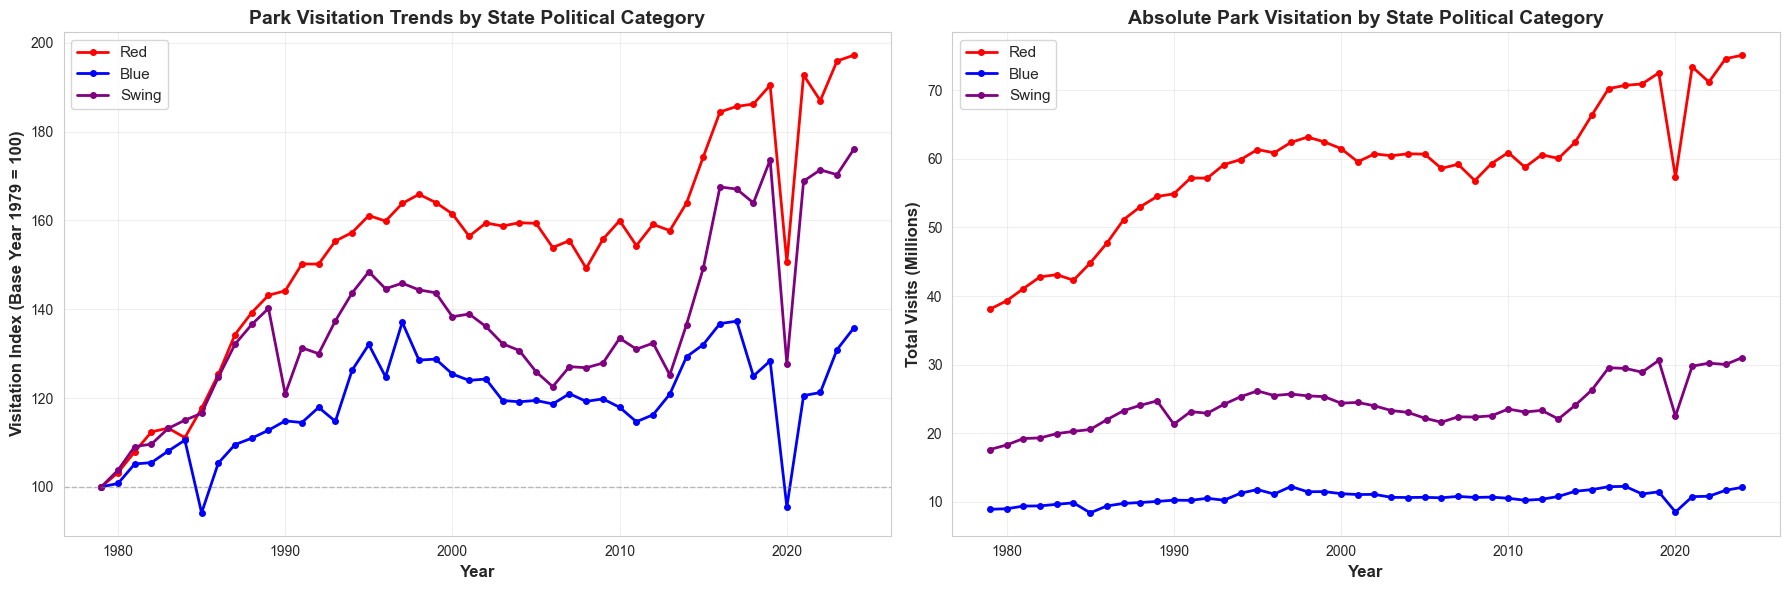

In [110]:
# Visualization 2: Time series showing visitation trends by state category
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Aggregate visitation by state category and year
yearly_by_category = df_with_voting[df_with_voting['StateCategory'].notna()].groupby(
    ['Year', 'StateCategory']
)['TotalVisits'].sum().reset_index()

# Normalize to index (base year = 100) for easier comparison
base_year = yearly_by_category['Year'].min()
for category in ['Red', 'Blue', 'Swing']:
    cat_data = yearly_by_category[yearly_by_category['StateCategory'] == category]
    base_value = cat_data[cat_data['Year'] == base_year]['TotalVisits'].values[0]
    yearly_by_category.loc[yearly_by_category['StateCategory'] == category, 'IndexedVisits'] = \
        (yearly_by_category.loc[yearly_by_category['StateCategory'] == category, 'TotalVisits'] / base_value) * 100

# Plot 1: Indexed time series
ax1 = axes[0]
for category in ['Red', 'Blue', 'Swing']:
    cat_data = yearly_by_category[yearly_by_category['StateCategory'] == category]
    ax1.plot(cat_data['Year'], cat_data['IndexedVisits'], 
            marker='o', linewidth=2, label=category, color=colors[category], markersize=4)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel(f'Visitation Index (Base Year {base_year} = 100)', fontsize=12, fontweight='bold')
ax1.set_title('Park Visitation Trends by State Political Category', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Plot 2: Absolute values
ax2 = axes[1]
for category in ['Red', 'Blue', 'Swing']:
    cat_data = yearly_by_category[yearly_by_category['StateCategory'] == category]
    ax2.plot(cat_data['Year'], cat_data['TotalVisits'] / 1e6,  # Convert to millions
            marker='o', linewidth=2, label=category, color=colors[category], markersize=4)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Visits (Millions)', fontsize=12, fontweight='bold')
ax2.set_title('Absolute Park Visitation by State Political Category', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Summary and Key Findings


In [111]:
# Print comprehensive summary
print("="*70)
print("CORRELATION ANALYSIS: STATE VOTING PATTERNS vs PARK VISITATION")
print("="*70)

print("\n1. DATA OVERVIEW:")
print(f"   - States analyzed: {len(correlation_df)}")
print(f"   - Red states: {len(correlation_df[correlation_df['StateCategory'] == 'Red'])}")
print(f"   - Blue states: {len(correlation_df[correlation_df['StateCategory'] == 'Blue'])}")
print(f"   - Swing states: {len(correlation_df[correlation_df['StateCategory'] == 'Swing'])}")
print(f"   - Voting data period: 1976-2020")
print(f"   - Visitation data period: {df['Year'].min()}-{df['Year'].max()}")

print("\n2. CORRELATION RESULTS:")
if len(valid_data) > 2:
    print(f"   - Correlation coefficient: {corr_coef:.4f}")
    print(f"   - P-value: {p_value:.4f}")
    print(f"   - Statistical significance: {'YES' if p_value < 0.05 else 'NO'}")
    
print("\n3. VISITATION CHANGES BY STATE CATEGORY:")
for category in ['Red', 'Blue', 'Swing']:
    cat_data = correlation_df[correlation_df['StateCategory'] == category]
    if len(cat_data) > 0:
        print(f"   {category} States:")
        print(f"      Mean change: {cat_data['PercentChange'].mean():.2f}%")
        print(f"      Median change: {cat_data['PercentChange'].median():.2f}%")

print("\n4. KEY INSIGHTS:")
if len(valid_data) > 2:
    if abs(corr_coef) < 0.3:
        print("   - The correlation between state voting patterns and park visitation")
        print("     changes is WEAK, suggesting little to no relationship.")
    elif corr_coef > 0:
        print("   - There is a POSITIVE correlation: states that vote more Republican")
        print("     tend to have larger increases in park visitation.")
    else:
        print("   - There is a NEGATIVE correlation: states that vote more Democratic")
        print("     tend to have larger increases in park visitation.")
        
print("\n5. CONSIDERATIONS:")
print("   - Correlation does not imply causation")
print("   - Many factors influence park visitation (population, proximity, infrastructure)")
print("   - State voting patterns are just one lens to analyze the data")

print("\n" + "="*70)


CORRELATION ANALYSIS: STATE VOTING PATTERNS vs PARK VISITATION

1. DATA OVERVIEW:
   - States analyzed: 28
   - Red states: 14
   - Blue states: 4
   - Swing states: 10
   - Voting data period: 1976-2020
   - Visitation data period: 1979-2024

2. CORRELATION RESULTS:
   - Correlation coefficient: 0.2387
   - P-value: 0.2212
   - Statistical significance: NO

3. VISITATION CHANGES BY STATE CATEGORY:
   Red States:
      Mean change: 131.24%
      Median change: 76.57%
   Blue States:
      Mean change: 19.07%
      Median change: 17.07%
   Swing States:
      Mean change: 120.13%
      Median change: 55.76%

4. KEY INSIGHTS:
   - The correlation between state voting patterns and park visitation
     changes is WEAK, suggesting little to no relationship.

5. CONSIDERATIONS:
   - Correlation does not imply causation
   - Many factors influence park visitation (population, proximity, infrastructure)
   - State voting patterns are just one lens to analyze the data



In [112]:
# Export the state voting and visitation correlation data
correlation_df_export = correlation_df[['State', 'StateCategory', 'RepublicanPct', 
                                         'EarlyPeriod', 'LatePeriod', 'EarlyAvg', 'LateAvg',
                                         'PercentChange', 'AbsoluteChange']].copy()

# Sort by visitation change
correlation_df_export = correlation_df_export.sort_values('PercentChange', ascending=False)

# Export to CSV
output_file = 'state_voting_visitation_correlation.csv'
correlation_df_export.to_csv(output_file, index=False)
print(f"\nCorrelation analysis exported to: {output_file}")

# Display the full table
print("\nComplete State-by-State Analysis:")
print(correlation_df_export.to_string(index=False))



Correlation analysis exported to: state_voting_visitation_correlation.csv

Complete State-by-State Analysis:
State StateCategory  RepublicanPct EarlyPeriod LatePeriod   EarlyAvg    LateAvg  PercentChange  AbsoluteChange
   SC           Red      91.666667   1985-1989  2020-2024    20191.8   206234.4     921.376995        186042.6
   WV         Swing      58.333333   1984-1988  2020-2024   345629.6  1572355.4     354.924983       1226725.8
   NV         Swing      50.000000   1979-1983  2020-2024    32735.4   142174.2     334.313312        109438.8
   OH         Swing      58.333333   1979-1983  2020-2024   675232.4  2803345.6     315.167519       2128113.2
   UT           Red     100.000000   1979-1983  2020-2024  2662575.2 10783605.6     305.006612       8121030.4
   AK           Red     100.000000   1979-1983  2020-2024   700831.6  2108303.4     200.828815       1407471.8
   AZ           Red      83.333333   1979-1983  2020-2024  4129550.0  9645356.0     133.569178       5515806.0
  

## 9. Election Cycle Analysis: How Party Flips Affect Visitation


In [113]:
# Identify party flips in each election cycle
# Get the winner for each state in each election year
state_election_results = state_votes_pivot[['year', 'state', 'Winner']].copy()
state_election_results = state_election_results.sort_values(['state', 'year'])

# Get state abbreviations
state_election_results = state_election_results.merge(
    state_abbrev_mapping, left_on='state', right_on='state', how='left'
)

# Identify flips (when winner changes from previous election)
state_election_results['PreviousWinner'] = state_election_results.groupby('state')['Winner'].shift(1)
state_election_results['Flipped'] = state_election_results['Winner'] != state_election_results['PreviousWinner']
state_election_results['FlipType'] = state_election_results.apply(
    lambda row: f"{row['PreviousWinner']}->{row['Winner']}" if row['Flipped'] and pd.notna(row['PreviousWinner']) else 'No Flip',
    axis=1
)

print("Party Flips in Presidential Elections (1976-2020):")
print("="*70)

# Count flips by state
flip_counts = state_election_results[state_election_results['Flipped'] == True].groupby('state').size().reset_index()
flip_counts.columns = ['State', 'NumberOfFlips']
flip_counts = flip_counts.sort_values('NumberOfFlips', ascending=False)

print(f"\nTotal flip events: {state_election_results['Flipped'].sum()}")
print(f"States that flipped at least once: {len(flip_counts)}")

print("\nTop 10 States by Number of Flips:")
print(flip_counts.head(10).to_string(index=False))

print("\n\nFlips by Type:")
flip_type_counts = state_election_results[state_election_results['FlipType'] != 'No Flip'].groupby('FlipType').size()
print(flip_type_counts)

print("\n\nSample of flip events:")
flip_events = state_election_results[state_election_results['Flipped'] == True][
    ['year', 'state', 'state_po', 'PreviousWinner', 'Winner', 'FlipType']
]
print(flip_events.head(15).to_string(index=False))

state_election_results.head(10)


Party Flips in Presidential Elections (1976-2020):

Total flip events: 145
States that flipped at least once: 51

Top 10 States by Number of Flips:
       State  NumberOfFlips
        OHIO              6
     FLORIDA              6
     GEORGIA              5
   WISCONSIN              5
        IOWA              5
PENNSYLVANIA              5
      NEVADA              4
   TENNESSEE              4
   LOUISIANA              4
    KENTUCKY              4


Flips by Type:
FlipType
DEMOCRAT->REPUBLICAN    46
REPUBLICAN->DEMOCRAT    48
dtype: int64


Sample of flip events:
 year      state state_po PreviousWinner     Winner             FlipType
 1976    ALABAMA       AL            NaN   DEMOCRAT              No Flip
 1980    ALABAMA       AL       DEMOCRAT REPUBLICAN DEMOCRAT->REPUBLICAN
 1976     ALASKA       AK            NaN REPUBLICAN              No Flip
 1976    ARIZONA       AZ            NaN REPUBLICAN              No Flip
 1996    ARIZONA       AZ     REPUBLICAN   DEMOCRAT REPUBLICA

,year,state,Winner,state_po,PreviousWinner,Flipped,FlipType
0,1976,ALABAMA,DEMOCRAT,AL,NaN,True,No Flip
1,1980,ALABAMA,REPUBLICAN,AL,DEMOCRAT,True,DEMOCRAT->REPUBLICAN
2,1984,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip
3,1988,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip
4,1992,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip
5,1996,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip
6,2000,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip
7,2004,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip
8,2008,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip
9,2012,ALABAMA,REPUBLICAN,AL,REPUBLICAN,False,No Flip


In [114]:
# Calculate visitation changes around election years
# Get annual visitation by state (summing all parks in that state)
annual_state_visits = df_with_voting[df_with_voting['StateCategory'].notna()].groupby(
    ['State', 'Year']
)['TotalVisits'].sum().reset_index()

# Merge election results with visitation data
election_visitation = state_election_results.merge(
    annual_state_visits, 
    left_on=['state_po', 'year'], 
    right_on=['State', 'Year'], 
    how='inner'
)

# Calculate year-over-year change in visitation
election_visitation = election_visitation.sort_values(['state', 'year'])
election_visitation['PrevYearVisits'] = election_visitation.groupby('state')['TotalVisits'].shift(1)
election_visitation['NextYearVisits'] = election_visitation.groupby('state')['TotalVisits'].shift(-1)

# Calculate percentage changes
election_visitation['VisitChangeFromPrevYear'] = (
    (election_visitation['TotalVisits'] - election_visitation['PrevYearVisits']) / 
    election_visitation['PrevYearVisits'] * 100
)
election_visitation['VisitChangeToNextYear'] = (
    (election_visitation['NextYearVisits'] - election_visitation['TotalVisits']) / 
    election_visitation['TotalVisits'] * 100
)

# Calculate 2-year change (election year to 2 years after)
election_visitation['TwoYearsAfterVisits'] = election_visitation.groupby('state')['TotalVisits'].shift(-2)
election_visitation['VisitChange2YearsAfter'] = (
    (election_visitation['TwoYearsAfterVisits'] - election_visitation['TotalVisits']) / 
    election_visitation['TotalVisits'] * 100
)

print("Visitation Changes Around Election Years:")
print("="*70)
print("\nSample data:")
election_visitation[['year', 'state', 'Winner', 'Flipped', 'FlipType', 
                      'TotalVisits', 'VisitChangeFromPrevYear', 'VisitChangeToNextYear']].head(15)


Visitation Changes Around Election Years:

Sample data:


,year,state,Winner,Flipped,FlipType,TotalVisits,VisitChangeFromPrevYear,VisitChangeToNextYear
0,1980,ALASKA,REPUBLICAN,False,No Flip,656618,NaN,28.684410
1,1984,ALASKA,REPUBLICAN,False,No Flip,844965,28.684410,121.114957
2,1988,ALASKA,REPUBLICAN,False,No Flip,1868344,121.114957,-5.071443
3,1992,ALASKA,REPUBLICAN,False,No Flip,1773592,-5.071443,1.356062
4,1996,ALASKA,REPUBLICAN,False,No Flip,1797643,1.356062,8.497516
5,2000,ALASKA,REPUBLICAN,False,No Flip,1950398,8.497516,-1.621823
6,2004,ALASKA,REPUBLICAN,False,No Flip,1918766,-1.621823,2.857357
7,2008,ALASKA,REPUBLICAN,False,No Flip,1973592,2.857357,11.623274
8,2012,ALASKA,REPUBLICAN,False,No Flip,2202988,11.623274,10.383125
9,2016,ALASKA,REPUBLICAN,False,No Flip,2431727,10.383125,-65.928165


In [115]:
# Compare visitation changes: Flip years vs Non-flip years
print("="*70)
print("IMPACT OF PARTY FLIPS ON PARK VISITATION")
print("="*70)

# Filter to valid data (exclude first year where we can't calculate change from previous)
valid_data = election_visitation[election_visitation['VisitChangeFromPrevYear'].notna()].copy()

# Separate flip vs non-flip years
flip_years = valid_data[valid_data['Flipped'] == True]
no_flip_years = valid_data[valid_data['Flipped'] == False]

print("\n1. OVERALL COMPARISON: Flip Years vs Non-Flip Years")
print("-" * 70)
print(f"Flip election years: {len(flip_years)}")
print(f"Non-flip election years: {len(no_flip_years)}")

print("\nAverage Visitation Change in Year AFTER Election:")
print(f"  When state FLIPPED parties: {flip_years['VisitChangeToNextYear'].mean():.2f}%")
print(f"  When state STAYED same party: {no_flip_years['VisitChangeToNextYear'].mean():.2f}%")

print("\nAverage Visitation Change 2 Years After Election:")
print(f"  When state FLIPPED parties: {flip_years['VisitChange2YearsAfter'].mean():.2f}%")
print(f"  When state STAYED same party: {no_flip_years['VisitChange2YearsAfter'].mean():.2f}%")

print("\n2. BREAKDOWN BY FLIP TYPE")
print("-" * 70)

# Compare different types of flips
flip_type_analysis = flip_years.groupby('FlipType').agg({
    'VisitChangeToNextYear': ['mean', 'median', 'count'],
    'VisitChange2YearsAfter': ['mean', 'median']
}).round(2)

print("\nVisitation Changes by Flip Direction:")
print(flip_type_analysis)

print("\n3. STATISTICAL SIGNIFICANCE TEST")
print("-" * 70)

# T-test to see if the difference is statistically significant
from scipy.stats import ttest_ind

# Test for change in year after election
flip_changes = flip_years['VisitChangeToNextYear'].dropna()
no_flip_changes = no_flip_years['VisitChangeToNextYear'].dropna()

if len(flip_changes) > 1 and len(no_flip_changes) > 1:
    t_stat, p_value = ttest_ind(flip_changes, no_flip_changes)
    print(f"\nT-test: Visitation change (year after election)")
    print(f"  Flip years mean: {flip_changes.mean():.2f}%")
    print(f"  Non-flip years mean: {no_flip_changes.mean():.2f}%")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Statistically significant: {'YES' if p_value < 0.05 else 'NO'}")

# Test for 2-year change
flip_changes_2yr = flip_years['VisitChange2YearsAfter'].dropna()
no_flip_changes_2yr = no_flip_years['VisitChange2YearsAfter'].dropna()

if len(flip_changes_2yr) > 1 and len(no_flip_changes_2yr) > 1:
    t_stat_2yr, p_value_2yr = ttest_ind(flip_changes_2yr, no_flip_changes_2yr)
    print(f"\nT-test: Visitation change (2 years after election)")
    print(f"  Flip years mean: {flip_changes_2yr.mean():.2f}%")
    print(f"  Non-flip years mean: {no_flip_changes_2yr.mean():.2f}%")
    print(f"  T-statistic: {t_stat_2yr:.4f}")
    print(f"  P-value: {p_value_2yr:.4f}")
    print(f"  Statistically significant: {'YES' if p_value_2yr < 0.05 else 'NO'}")

print("\n" + "="*70)


IMPACT OF PARTY FLIPS ON PARK VISITATION

1. OVERALL COMPARISON: Flip Years vs Non-Flip Years
----------------------------------------------------------------------
Flip election years: 44
Non-flip election years: 233

Average Visitation Change in Year AFTER Election:
  When state FLIPPED parties: 7.81%
  When state STAYED same party: 3.57%

Average Visitation Change 2 Years After Election:
  When state FLIPPED parties: 12.43%
  When state STAYED same party: 7.74%

2. BREAKDOWN BY FLIP TYPE
----------------------------------------------------------------------

Visitation Changes by Flip Direction:
                     VisitChangeToNextYear               \
                                      mean median count   
FlipType                                                  
DEMOCRAT->REPUBLICAN                 -5.49  -0.61    17   
REPUBLICAN->DEMOCRAT                 16.84   6.43    25   

                     VisitChange2YearsAfter         
                                       mean m

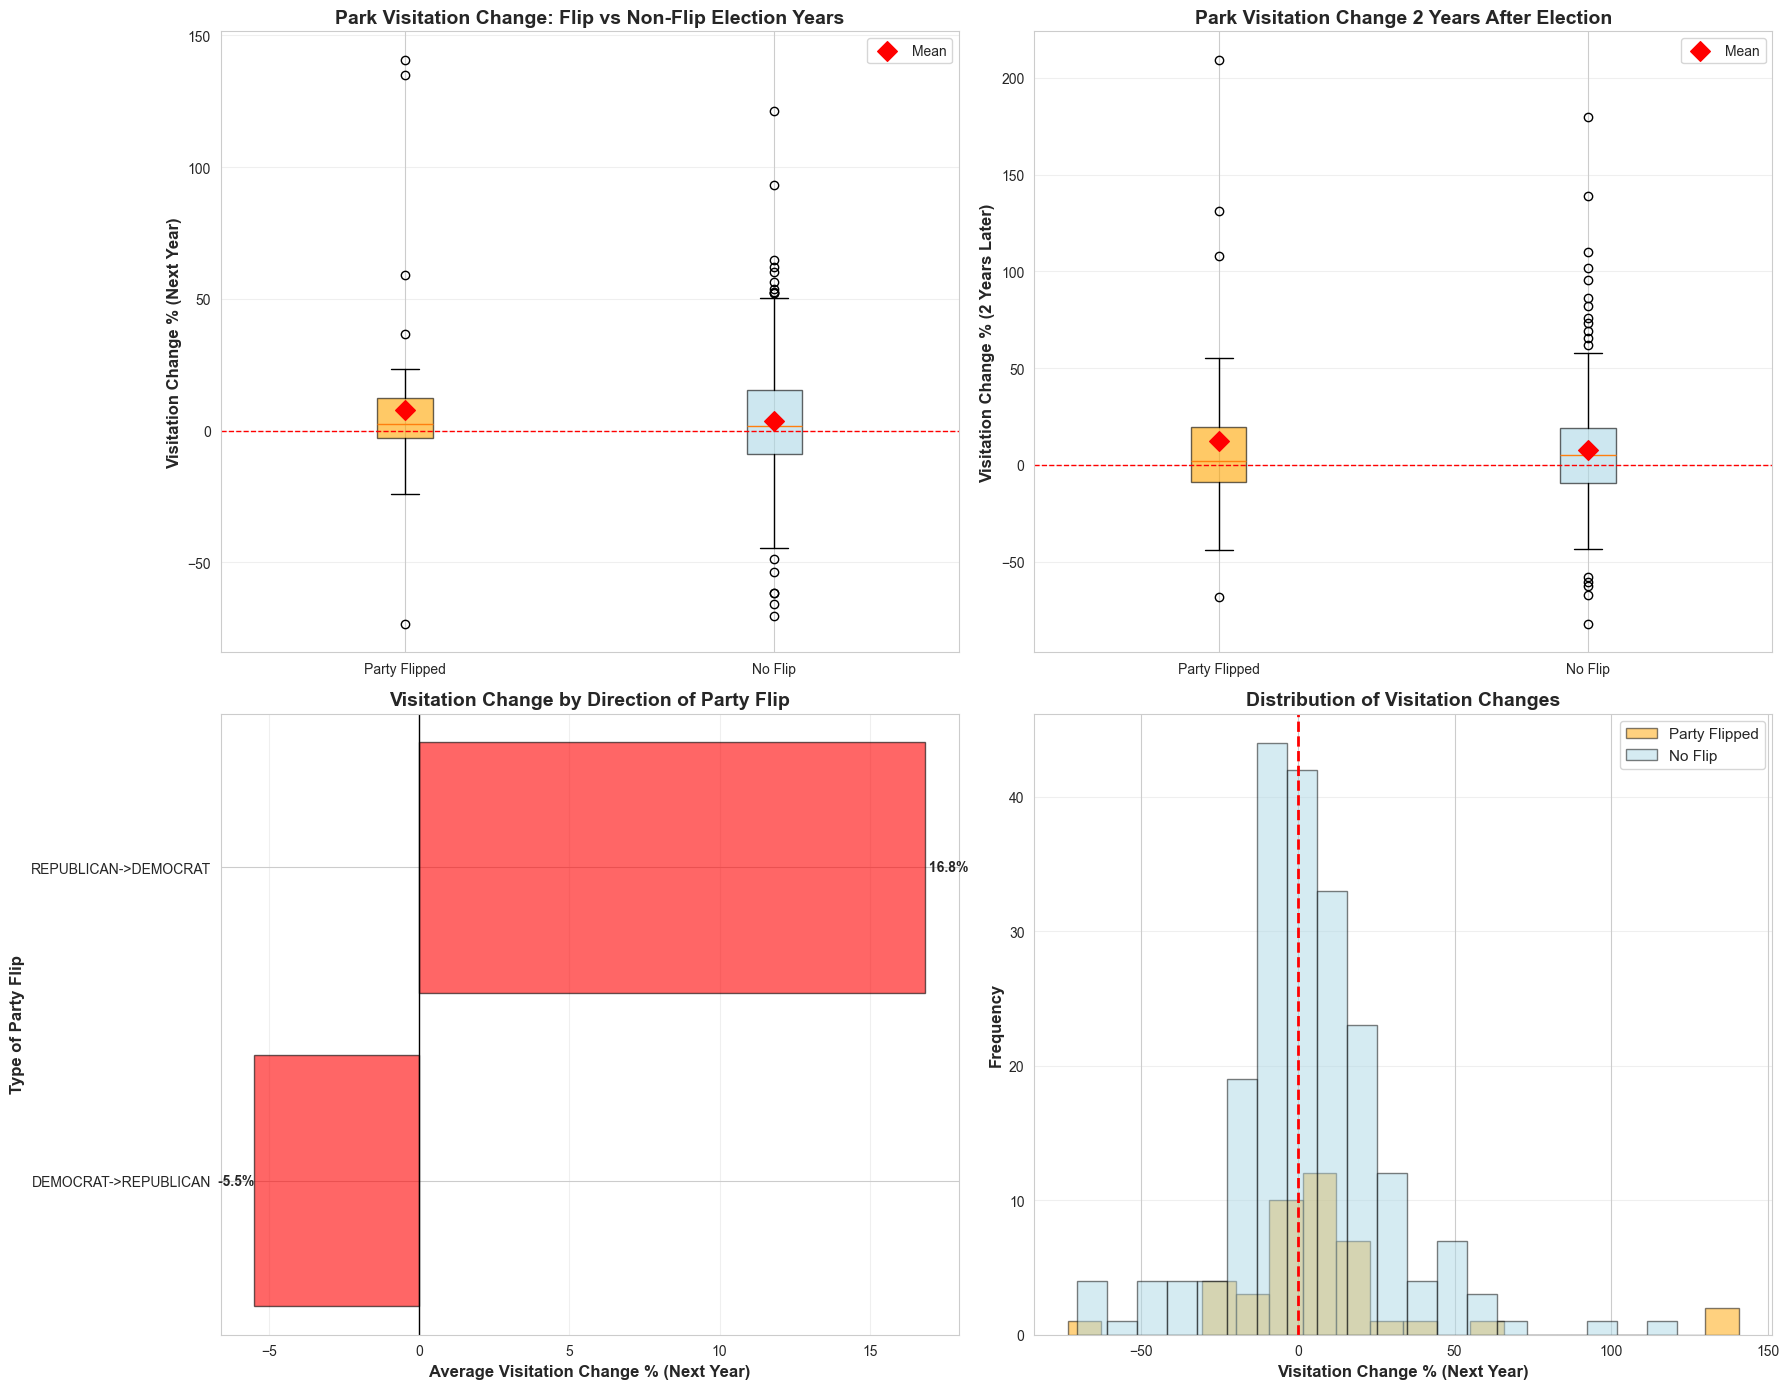

In [116]:
# Visualization 1: Comparing Flip vs Non-Flip Years
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Box plot - Visitation change in year after election
ax1 = axes[0, 0]
flip_data_1yr = [
    flip_years['VisitChangeToNextYear'].dropna(),
    no_flip_years['VisitChangeToNextYear'].dropna()
]
bp1 = ax1.boxplot(flip_data_1yr, labels=['Party Flipped', 'No Flip'], patch_artist=True)
bp1['boxes'][0].set_facecolor('orange')
bp1['boxes'][1].set_facecolor('lightblue')
for box in bp1['boxes']:
    box.set_alpha(0.6)

ax1.set_ylabel('Visitation Change % (Next Year)', fontsize=12, fontweight='bold')
ax1.set_title('Park Visitation Change: Flip vs Non-Flip Election Years', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Add mean markers
means_1yr = [flip_years['VisitChangeToNextYear'].mean(), no_flip_years['VisitChangeToNextYear'].mean()]
ax1.scatter([1, 2], means_1yr, color='red', s=100, zorder=3, marker='D', label='Mean')
ax1.legend()

# Plot 2: Box plot - Visitation change 2 years after election
ax2 = axes[0, 1]
flip_data_2yr = [
    flip_years['VisitChange2YearsAfter'].dropna(),
    no_flip_years['VisitChange2YearsAfter'].dropna()
]
bp2 = ax2.boxplot(flip_data_2yr, labels=['Party Flipped', 'No Flip'], patch_artist=True)
bp2['boxes'][0].set_facecolor('orange')
bp2['boxes'][1].set_facecolor('lightblue')
for box in bp2['boxes']:
    box.set_alpha(0.6)

ax2.set_ylabel('Visitation Change % (2 Years Later)', fontsize=12, fontweight='bold')
ax2.set_title('Park Visitation Change 2 Years After Election', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Add mean markers
means_2yr = [flip_years['VisitChange2YearsAfter'].mean(), no_flip_years['VisitChange2YearsAfter'].mean()]
ax2.scatter([1, 2], means_2yr, color='red', s=100, zorder=3, marker='D', label='Mean')
ax2.legend()

# Plot 3: Bar chart by flip type
ax3 = axes[1, 0]
flip_type_means = flip_years.groupby('FlipType')['VisitChangeToNextYear'].mean().sort_values()
colors_flip = ['red' if 'REPUBLICAN' in x else 'blue' for x in flip_type_means.index]
bars = ax3.barh(flip_type_means.index, flip_type_means.values, color=colors_flip, alpha=0.6, edgecolor='black')

ax3.set_xlabel('Average Visitation Change % (Next Year)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Type of Party Flip', fontsize=12, fontweight='bold')
ax3.set_title('Visitation Change by Direction of Party Flip', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')
ax3.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Add value labels
for i, (idx, val) in enumerate(flip_type_means.items()):
    ax3.text(val, i, f' {val:.1f}%', va='center', ha='left' if val > 0 else 'right', fontweight='bold')

# Plot 4: Distribution comparison (histogram)
ax4 = axes[1, 1]
ax4.hist(flip_years['VisitChangeToNextYear'].dropna(), bins=20, alpha=0.5, 
         label='Party Flipped', color='orange', edgecolor='black')
ax4.hist(no_flip_years['VisitChangeToNextYear'].dropna(), bins=20, alpha=0.5, 
         label='No Flip', color='lightblue', edgecolor='black')

ax4.set_xlabel('Visitation Change % (Next Year)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax4.set_title('Distribution of Visitation Changes', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


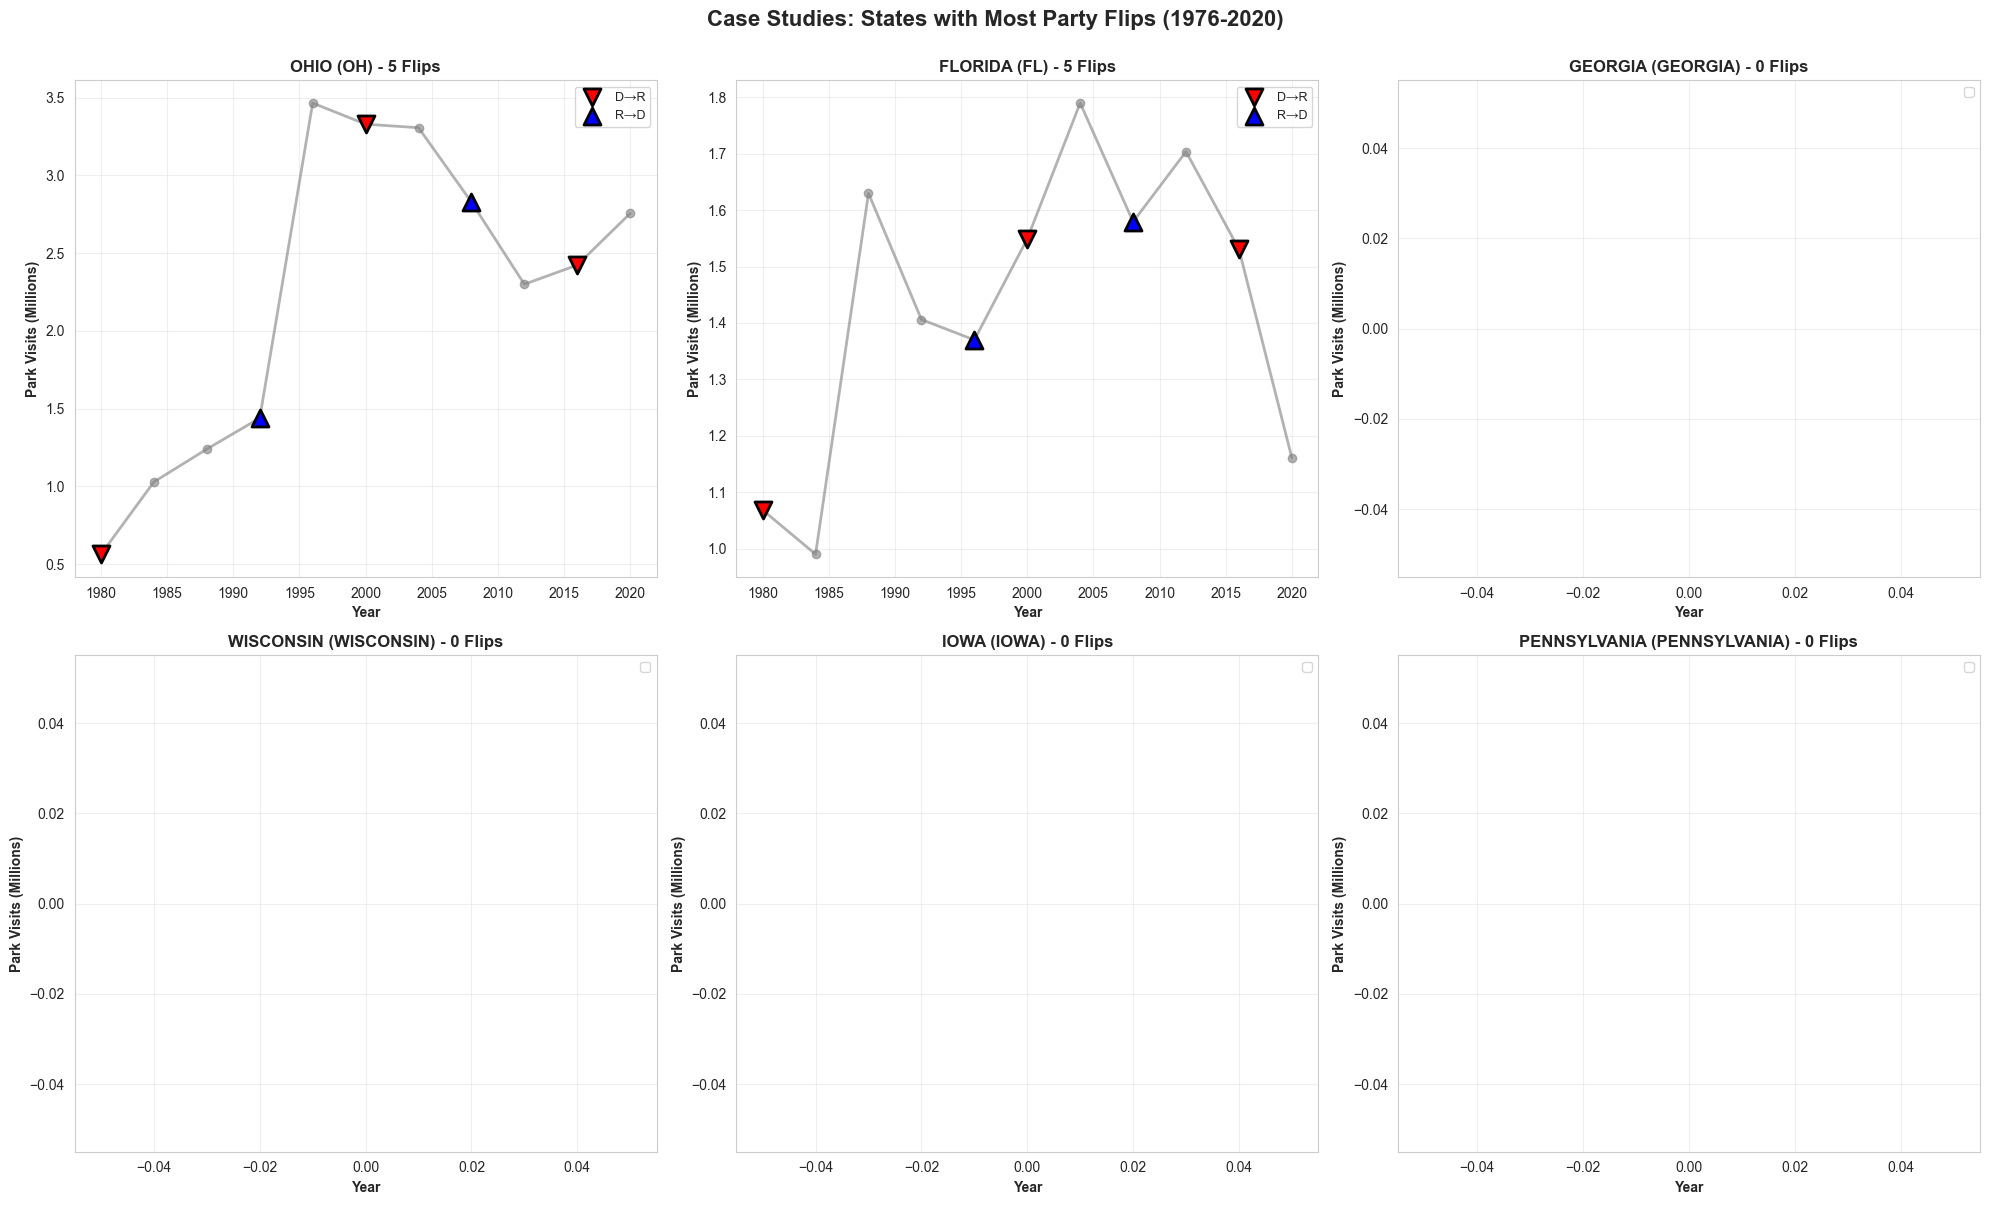

In [117]:
# Visualization 2: Case Studies - States that flipped multiple times
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Get states that flipped most frequently
top_flip_states = flip_counts.head(6)['State'].tolist()

for idx, state in enumerate(top_flip_states):
    ax = axes[idx]
    
    # Get data for this state
    state_data = election_visitation[election_visitation['state'] == state].sort_values('year')
    
    # Get state abbreviation for title
    state_abbrev = state_data['state_po'].iloc[0] if len(state_data) > 0 else state
    
    # Plot visitation over time
    ax.plot(state_data['year'], state_data['TotalVisits'] / 1e6, 
            marker='o', linewidth=2, markersize=6, color='gray', alpha=0.6)
    
    # Highlight flip years
    flip_data = state_data[state_data['Flipped'] == True]
    dem_to_rep = flip_data[flip_data['FlipType'] == 'DEMOCRAT->REPUBLICAN']
    rep_to_dem = flip_data[flip_data['FlipType'] == 'REPUBLICAN->DEMOCRAT']
    
    if len(dem_to_rep) > 0:
        ax.scatter(dem_to_rep['year'], dem_to_rep['TotalVisits'] / 1e6, 
                  color='red', s=150, marker='v', zorder=5, label='D→R', edgecolors='black', linewidth=2)
    
    if len(rep_to_dem) > 0:
        ax.scatter(rep_to_dem['year'], rep_to_dem['TotalVisits'] / 1e6, 
                  color='blue', s=150, marker='^', zorder=5, label='R→D', edgecolors='black', linewidth=2)
    
    ax.set_xlabel('Year', fontsize=10, fontweight='bold')
    ax.set_ylabel('Park Visits (Millions)', fontsize=10, fontweight='bold')
    ax.set_title(f'{state} ({state_abbrev}) - {len(flip_data)} Flips', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

plt.suptitle('Case Studies: States with Most Party Flips (1976-2020)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


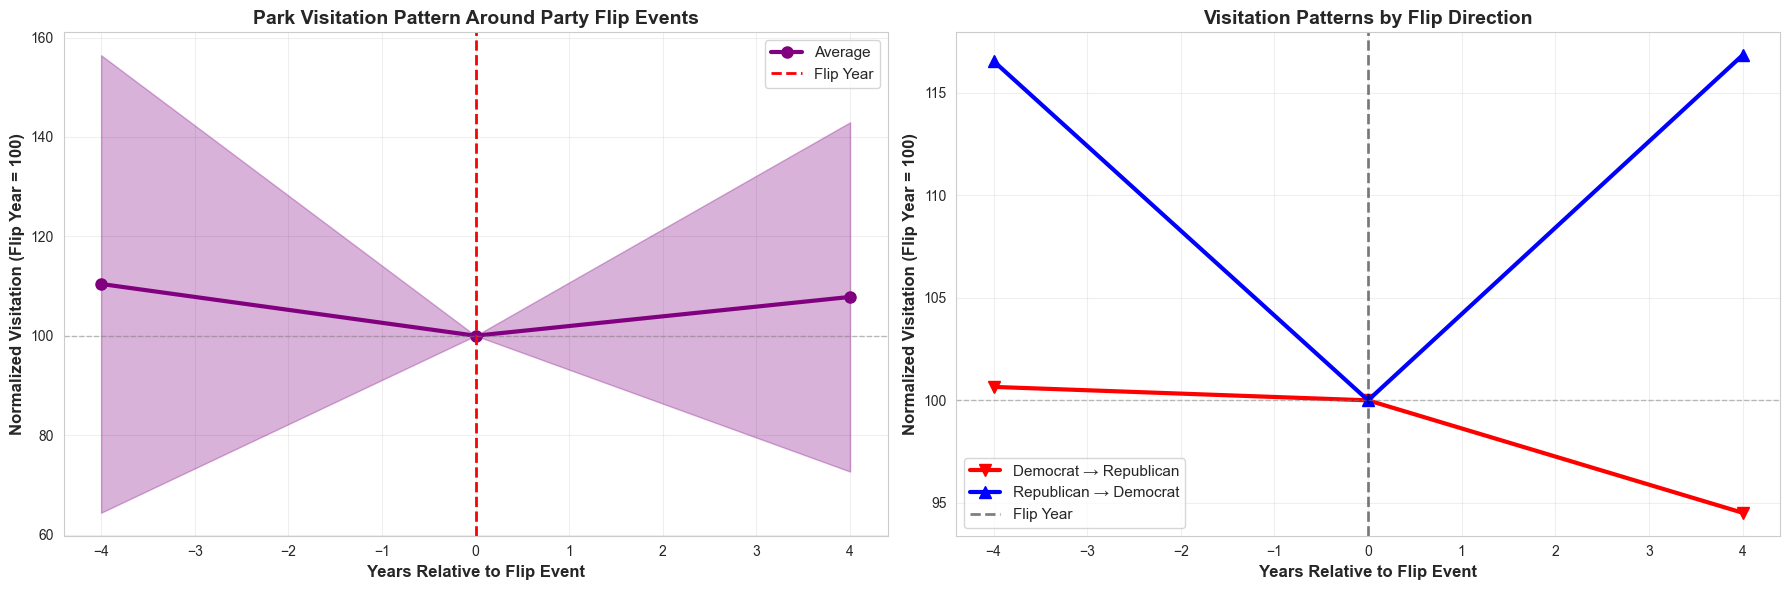

In [118]:
# Visualization 3: Average visitation pattern around flip events
# Normalize time relative to flip year (flip year = 0)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Function to get visitation pattern around flip events
def get_flip_patterns(flip_type_filter=None):
    """Get normalized visitation data around flip events"""
    patterns = []
    
    flip_events_list = flip_years if flip_type_filter is None else flip_years[flip_years['FlipType'] == flip_type_filter]
    
    for _, flip_event in flip_events_list.iterrows():
        state = flip_event['state']
        flip_year = flip_event['year']
        
        # Get data for this state around flip year (±4 years)
        state_years = election_visitation[
            (election_visitation['state'] == state) &
            (election_visitation['year'] >= flip_year - 4) &
            (election_visitation['year'] <= flip_year + 4)
        ].copy()
        
        if len(state_years) > 0:
            state_years['YearsFromFlip'] = state_years['year'] - flip_year
            
            # Normalize visitation to flip year = 100
            flip_year_visits = state_years[state_years['YearsFromFlip'] == 0]['TotalVisits'].values[0]
            if flip_year_visits > 0:
                state_years['NormalizedVisits'] = (state_years['TotalVisits'] / flip_year_visits) * 100
                patterns.append(state_years[['YearsFromFlip', 'NormalizedVisits']])
    
    if patterns:
        return pd.concat(patterns, ignore_index=True)
    return pd.DataFrame()

# Get patterns for all flips
all_flip_patterns = get_flip_patterns()

# Plot 1: All flips combined
ax1 = axes[0]
if len(all_flip_patterns) > 0:
    avg_pattern = all_flip_patterns.groupby('YearsFromFlip')['NormalizedVisits'].agg(['mean', 'std', 'count']).reset_index()
    
    ax1.plot(avg_pattern['YearsFromFlip'], avg_pattern['mean'], 
            marker='o', linewidth=3, markersize=8, color='purple', label='Average')
    
    # Add confidence interval
    ax1.fill_between(avg_pattern['YearsFromFlip'], 
                     avg_pattern['mean'] - avg_pattern['std'], 
                     avg_pattern['mean'] + avg_pattern['std'],
                     alpha=0.3, color='purple')
    
    ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Flip Year')
    ax1.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    
    ax1.set_xlabel('Years Relative to Flip Event', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Normalized Visitation (Flip Year = 100)', fontsize=12, fontweight='bold')
    ax1.set_title('Park Visitation Pattern Around Party Flip Events', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=11)
    ax1.set_xticks(range(-4, 5))

# Plot 2: Compare D→R vs R→D flips
ax2 = axes[1]
dem_to_rep_patterns = get_flip_patterns('DEMOCRAT->REPUBLICAN')
rep_to_dem_patterns = get_flip_patterns('REPUBLICAN->DEMOCRAT')

if len(dem_to_rep_patterns) > 0:
    avg_dr = dem_to_rep_patterns.groupby('YearsFromFlip')['NormalizedVisits'].mean().reset_index()
    ax2.plot(avg_dr['YearsFromFlip'], avg_dr['NormalizedVisits'], 
            marker='v', linewidth=3, markersize=8, color='red', label='Democrat → Republican')

if len(rep_to_dem_patterns) > 0:
    avg_rd = rep_to_dem_patterns.groupby('YearsFromFlip')['NormalizedVisits'].mean().reset_index()
    ax2.plot(avg_rd['YearsFromFlip'], avg_rd['NormalizedVisits'], 
            marker='^', linewidth=3, markersize=8, color='blue', label='Republican → Democrat')

ax2.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.5, label='Flip Year')
ax2.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax2.set_xlabel('Years Relative to Flip Event', fontsize=12, fontweight='bold')
ax2.set_ylabel('Normalized Visitation (Flip Year = 100)', fontsize=12, fontweight='bold')
ax2.set_title('Visitation Patterns by Flip Direction', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xticks(range(-4, 5))

plt.tight_layout()
plt.show()


### Key Findings: Election Cycle Effects


In [119]:
# Summary of Election Cycle Analysis
print("="*80)
print("SUMMARY: HOW ELECTION FLIPS AFFECT NATIONAL PARK VISITATION")
print("="*80)

# Calculate key metrics
flip_avg_1yr = flip_years['VisitChangeToNextYear'].mean()
no_flip_avg_1yr = no_flip_years['VisitChangeToNextYear'].mean()
diff_1yr = flip_avg_1yr - no_flip_avg_1yr

flip_avg_2yr = flip_years['VisitChange2YearsAfter'].mean()
no_flip_avg_2yr = no_flip_years['VisitChange2YearsAfter'].mean()
diff_2yr = flip_avg_2yr - no_flip_avg_2yr

print("\n📊 MAIN FINDINGS:")
print("-" * 80)
print(f"1. Number of party flip events (1976-2020): {state_election_results['Flipped'].sum()}")
print(f"   - Democrat → Republican: {(flip_years['FlipType'] == 'DEMOCRAT->REPUBLICAN').sum()}")
print(f"   - Republican → Democrat: {(flip_years['FlipType'] == 'REPUBLICAN->DEMOCRAT').sum()}")

print(f"\n2. Average visitation change in year AFTER election:")
print(f"   - When state flipped: {flip_avg_1yr:+.2f}%")
print(f"   - When state stayed same: {no_flip_avg_1yr:+.2f}%")
print(f"   - Difference: {diff_1yr:+.2f} percentage points")

print(f"\n3. Average visitation change 2 YEARS after election:")
print(f"   - When state flipped: {flip_avg_2yr:+.2f}%")
print(f"   - When state stayed same: {no_flip_avg_2yr:+.2f}%")
print(f"   - Difference: {diff_2yr:+.2f} percentage points")

print(f"\n4. Statistical significance:")
if 't_stat' in locals() and 'p_value' in locals():
    significance = "YES (p < 0.05)" if p_value < 0.05 else "NO (p ≥ 0.05)"
    print(f"   - 1-year change: {significance} (p-value: {p_value:.4f})")
if 't_stat_2yr' in locals() and 'p_value_2yr' in locals():
    significance_2yr = "YES (p < 0.05)" if p_value_2yr < 0.05 else "NO (p ≥ 0.05)"
    print(f"   - 2-year change: {significance_2yr} (p-value: {p_value_2yr:.4f})")

print("\n5. Flip direction analysis:")
flip_type_summary = flip_years.groupby('FlipType')['VisitChangeToNextYear'].agg(['mean', 'count'])
for flip_type, row in flip_type_summary.iterrows():
    print(f"   - {flip_type}: {row['mean']:+.2f}% (n={int(row['count'])})")

print("\n6. States with most flips:")
for i, row in flip_counts.head(5).iterrows():
    state_abbrev = state_abbrev_mapping[state_abbrev_mapping['state'] == row['State']]['state_po'].iloc[0]
    print(f"   - {row['State']} ({state_abbrev}): {row['NumberOfFlips']} flips")

print("\n💡 INTERPRETATION:")
print("-" * 80)
if abs(diff_1yr) < 1:
    print("✓ Party flips have minimal impact on park visitation changes.")
    print("  The difference is less than 1 percentage point.")
elif diff_1yr > 0:
    print("✓ States that flip parties tend to have HIGHER visitation growth.")
    print(f"  On average, {abs(diff_1yr):.1f} percentage points higher.")
else:
    print("✓ States that flip parties tend to have LOWER visitation growth.")
    print(f"  On average, {abs(diff_1yr):.1f} percentage points lower.")

if 'p_value' in locals():
    if p_value < 0.05:
        print("✓ This difference is statistically significant.")
    else:
        print("✓ This difference is NOT statistically significant.")
        print("  The observed difference could be due to random variation.")

print("\n⚠️  IMPORTANT CONSIDERATIONS:")
print("-" * 80)
print("• Correlation does not imply causation")
print("• Many factors influence park visitation (weather, economy, gas prices, etc.)")
print("• Election outcomes may reflect broader societal trends")
print("• State-level voting patterns are just one analytical lens")
print("• Individual parks within states may have different trends")

print("\n" + "="*80)


SUMMARY: HOW ELECTION FLIPS AFFECT NATIONAL PARK VISITATION

📊 MAIN FINDINGS:
--------------------------------------------------------------------------------
1. Number of party flip events (1976-2020): 145
   - Democrat → Republican: 17
   - Republican → Democrat: 27

2. Average visitation change in year AFTER election:
   - When state flipped: +7.81%
   - When state stayed same: +3.57%
   - Difference: +4.24 percentage points

3. Average visitation change 2 YEARS after election:
   - When state flipped: +12.43%
   - When state stayed same: +7.74%
   - Difference: +4.69 percentage points

4. Statistical significance:
   - 1-year change: NO (p ≥ 0.05) (p-value: 0.3529)
   - 2-year change: NO (p ≥ 0.05) (p-value: 0.4676)

5. Flip direction analysis:
   - DEMOCRAT->REPUBLICAN: -5.49% (n=17)
   - REPUBLICAN->DEMOCRAT: +16.84% (n=25)

6. States with most flips:
   - OHIO (OH): 6 flips
   - FLORIDA (FL): 6 flips
   - GEORGIA (GA): 5 flips
   - WISCONSIN (WI): 5 flips
   - IOWA (IA): 5 flips

In [120]:
# Export election cycle analysis results
election_cycle_export = election_visitation[[
    'year', 'state', 'state_po', 'Winner', 'PreviousWinner', 'Flipped', 'FlipType',
    'TotalVisits', 'VisitChangeFromPrevYear', 'VisitChangeToNextYear', 'VisitChange2YearsAfter'
]].copy()

# Sort by year and state
election_cycle_export = election_cycle_export.sort_values(['state', 'year'])

# Export to CSV
output_file = 'election_cycle_park_visitation.csv'
election_cycle_export.to_csv(output_file, index=False)
print(f"✓ Election cycle analysis exported to: {output_file}")

# Also export flip events summary
flip_summary_export = flip_years[[
    'year', 'state', 'state_po', 'FlipType', 'TotalVisits',
    'VisitChangeFromPrevYear', 'VisitChangeToNextYear', 'VisitChange2YearsAfter'
]].copy()
flip_summary_export = flip_summary_export.sort_values(['year', 'state'])

output_file_2 = 'party_flip_events_summary.csv'
flip_summary_export.to_csv(output_file_2, index=False)
print(f"✓ Party flip events summary exported to: {output_file_2}")

print(f"\n✓ Total records in election cycle analysis: {len(election_cycle_export)}")
print(f"✓ Total flip events: {len(flip_summary_export)}")


✓ Election cycle analysis exported to: election_cycle_park_visitation.csv
✓ Party flip events summary exported to: party_flip_events_summary.csv

✓ Total records in election cycle analysis: 305
✓ Total flip events: 44


## 10. Bayesian Predictive Analysis: Expected Visitation by Political Leaning


In [121]:
# Calculate year-over-year visitation changes by state category
# This gives us the empirical distribution of visitation changes

# Get year-over-year changes for each state
state_yoy_changes = annual_state_visits.sort_values(['State', 'Year'])
state_yoy_changes['PrevYearVisits'] = state_yoy_changes.groupby('State')['TotalVisits'].shift(1)
state_yoy_changes['YoYChange'] = (
    (state_yoy_changes['TotalVisits'] - state_yoy_changes['PrevYearVisits']) / 
    state_yoy_changes['PrevYearVisits'] * 100
)

# Merge with state categories
state_yoy_with_category = state_yoy_changes.merge(
    state_voting_summary[['StateAbbrev', 'StateCategory', 'RepublicanPct']], 
    left_on='State', 
    right_on='StateAbbrev', 
    how='left'
)

# Filter to valid data
state_yoy_with_category = state_yoy_with_category[state_yoy_with_category['YoYChange'].notna()]
state_yoy_with_category = state_yoy_with_category[state_yoy_with_category['StateCategory'].notna()]

print("Year-over-Year Visitation Changes by State Political Category")
print("="*80)
print(f"\nTotal observations: {len(state_yoy_with_category)}")
print(f"Years covered: {state_yoy_with_category['Year'].min()} - {state_yoy_with_category['Year'].max()}")

# Calculate statistics for each category
print("\n" + "="*80)
print("DISTRIBUTION OF YEAR-OVER-YEAR VISITATION CHANGES")
print("="*80)

for category in ['Red', 'Blue', 'Swing']:
    cat_data = state_yoy_with_category[state_yoy_with_category['StateCategory'] == category]['YoYChange']
    
    if len(cat_data) > 0:
        print(f"\n{category.upper()} STATES:")
        print(f"  Number of observations: {len(cat_data)}")
        print(f"  Mean (Expected Value): {cat_data.mean():.2f}%")
        print(f"  Median: {cat_data.median():.2f}%")
        print(f"  Std Deviation: {cat_data.std():.2f}%")
        print(f"  Min: {cat_data.min():.2f}%")
        print(f"  Max: {cat_data.max():.2f}%")
        
        # Calculate percentiles (credible intervals)
        print(f"\n  Credible Intervals:")
        print(f"    50% CI (25th-75th percentile): [{cat_data.quantile(0.25):.2f}%, {cat_data.quantile(0.75):.2f}%]")
        print(f"    80% CI (10th-90th percentile): [{cat_data.quantile(0.10):.2f}%, {cat_data.quantile(0.90):.2f}%]")
        print(f"    95% CI (2.5th-97.5th percentile): [{cat_data.quantile(0.025):.2f}%, {cat_data.quantile(0.975):.2f}%]")
        
        # Probability of positive/negative change
        prob_increase = (cat_data > 0).sum() / len(cat_data) * 100
        prob_decrease = (cat_data < 0).sum() / len(cat_data) * 100
        print(f"\n  Probability of visitation increase: {prob_increase:.1f}%")
        print(f"  Probability of visitation decrease: {prob_decrease:.1f}%")

state_yoy_with_category.head()


Year-over-Year Visitation Changes by State Political Category

Total observations: 1249
Years covered: 1980 - 2024

DISTRIBUTION OF YEAR-OVER-YEAR VISITATION CHANGES

RED STATES:
  Number of observations: 624
  Mean (Expected Value): 2.84%
  Median: 1.73%
  Std Deviation: 16.64%
  Min: -76.35%
  Max: 138.66%

  Credible Intervals:
    50% CI (25th-75th percentile): [-3.36%, 6.69%]
    80% CI (10th-90th percentile): [-10.03%, 16.55%]
    95% CI (2.5th-97.5th percentile): [-24.80%, 40.87%]

  Probability of visitation increase: 60.4%
  Probability of visitation decrease: 39.6%

BLUE STATES:
  Number of observations: 180
  Mean (Expected Value): 1.07%
  Median: 0.40%
  Std Deviation: 10.80%
  Min: -43.33%
  Max: 43.50%

  Credible Intervals:
    50% CI (25th-75th percentile): [-4.57%, 6.47%]
    80% CI (10th-90th percentile): [-9.90%, 14.15%]
    95% CI (2.5th-97.5th percentile): [-21.83%, 20.26%]

  Probability of visitation increase: 51.7%
  Probability of visitation decrease: 48.3%

SW

,State,Year,TotalVisits,PrevYearVisits,YoYChange,StateAbbrev,StateCategory,RepublicanPct
1,AK,1980,656618,671719.0,-2.248113,AK,Red,100.0
2,AK,1981,651376,656618.0,-0.798333,AK,Red,100.0
3,AK,1982,766717,651376.0,17.707284,AK,Red,100.0
4,AK,1983,757728,766717.0,-1.172401,AK,Red,100.0
5,AK,1984,844965,757728.0,11.512970,AK,Red,100.0


In [122]:
# Bayesian Predictive Model: Given a state's political leaning, predict visitation change
# Using bootstrapping to estimate posterior distributions

from scipy import stats as sp_stats
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("BAYESIAN PREDICTIVE MODEL: EXPECTED VISITATION GIVEN POLITICAL LEANING")
print("="*80)

# Function to create predictive distribution using bootstrapping
def create_predictive_distribution(data, n_samples=10000):
    """Bootstrap to create posterior predictive distribution"""
    bootstrap_means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(sample.mean())
    return np.array(bootstrap_means)

# Create predictive distributions for each category
predictive_distributions = {}
summary_stats = {}

for category in ['Red', 'Blue', 'Swing']:
    cat_data = state_yoy_with_category[state_yoy_with_category['StateCategory'] == category]['YoYChange'].values
    
    if len(cat_data) > 0:
        # Create posterior predictive distribution
        posterior = create_predictive_distribution(cat_data, n_samples=10000)
        predictive_distributions[category] = posterior
        
        # Calculate summary statistics
        summary_stats[category] = {
            'mean': posterior.mean(),
            'median': np.median(posterior),
            'std': posterior.std(),
            'ci_50': (np.percentile(posterior, 25), np.percentile(posterior, 75)),
            'ci_80': (np.percentile(posterior, 10), np.percentile(posterior, 90)),
            'ci_95': (np.percentile(posterior, 2.5), np.percentile(posterior, 97.5)),
            'prob_positive': (posterior > 0).sum() / len(posterior) * 100,
            'n_observations': len(cat_data)
        }

# Print predictive model results
print("\n🎯 PREDICTIVE MODEL RESULTS:")
print("-"*80)
print("\nGiven a state's political category, here's what to expect for annual")
print("park visitation changes:\n")

for category in ['Red', 'Blue', 'Swing']:
    if category in summary_stats:
        stats = summary_stats[category]
        print(f"\n{'='*80}")
        print(f"IF STATE IS {category.upper()}:")
        print(f"{'='*80}")
        print(f"\n  Expected (Mean) Change: {stats['mean']:+.2f}%")
        print(f"  Most Likely (Median) Change: {stats['median']:+.2f}%")
        print(f"  Uncertainty (Std Dev): ±{stats['std']:.2f}%")
        
        print(f"\n  📊 Predictive Intervals (where we expect the change to fall):")
        print(f"     50% chance: {stats['ci_50'][0]:+.2f}% to {stats['ci_50'][1]:+.2f}%")
        print(f"     80% chance: {stats['ci_80'][0]:+.2f}% to {stats['ci_80'][1]:+.2f}%")
        print(f"     95% chance: {stats['ci_95'][0]:+.2f}% to {stats['ci_95'][1]:+.2f}%")
        
        print(f"\n  🎲 Probability of Outcomes:")
        print(f"     Visitation INCREASE: {stats['prob_positive']:.1f}%")
        print(f"     Visitation DECREASE: {100-stats['prob_positive']:.1f}%")
        
        print(f"\n  📈 Based on {stats['n_observations']} observations")

# Compare categories
print(f"\n\n{'='*80}")
print("COMPARATIVE ANALYSIS:")
print(f"{'='*80}")

if len(summary_stats) >= 2:
    categories = list(summary_stats.keys())
    
    # Find best and worst performers
    means = {cat: summary_stats[cat]['mean'] for cat in categories}
    best_cat = max(means, key=means.get)
    worst_cat = min(means, key=means.get)
    
    print(f"\n  Best Expected Performance: {best_cat} states ({means[best_cat]:+.2f}%)")
    print(f"  Worst Expected Performance: {worst_cat} states ({means[worst_cat]:+.2f}%)")
    print(f"  Difference: {means[best_cat] - means[worst_cat]:.2f} percentage points")
    
    # Calculate probability that one category outperforms another
    if 'Red' in predictive_distributions and 'Blue' in predictive_distributions:
        red_better = (predictive_distributions['Red'] > predictive_distributions['Blue']).sum()
        prob_red_better = red_better / len(predictive_distributions['Red']) * 100
        print(f"\n  Probability Red states have higher growth than Blue states: {prob_red_better:.1f}%")
        print(f"  Probability Blue states have higher growth than Red states: {100-prob_red_better:.1f}%")

print("\n" + "="*80)


BAYESIAN PREDICTIVE MODEL: EXPECTED VISITATION GIVEN POLITICAL LEANING

🎯 PREDICTIVE MODEL RESULTS:
--------------------------------------------------------------------------------

Given a state's political category, here's what to expect for annual
park visitation changes:


IF STATE IS RED:

  Expected (Mean) Change: +2.85%
  Most Likely (Median) Change: +2.84%
  Uncertainty (Std Dev): ±0.67%

  📊 Predictive Intervals (where we expect the change to fall):
     50% chance: +2.40% to +3.28%
     80% chance: +2.00% to +3.70%
     95% chance: +1.56% to +4.19%

  🎲 Probability of Outcomes:
     Visitation INCREASE: 100.0%
     Visitation DECREASE: 0.0%

  📈 Based on 624 observations

IF STATE IS BLUE:

  Expected (Mean) Change: +1.08%
  Most Likely (Median) Change: +1.07%
  Uncertainty (Std Dev): ±0.80%

  📊 Predictive Intervals (where we expect the change to fall):
     50% chance: +0.54% to +1.62%
     80% chance: +0.05% to +2.11%
     95% chance: -0.47% to +2.64%

  🎲 Probability of O

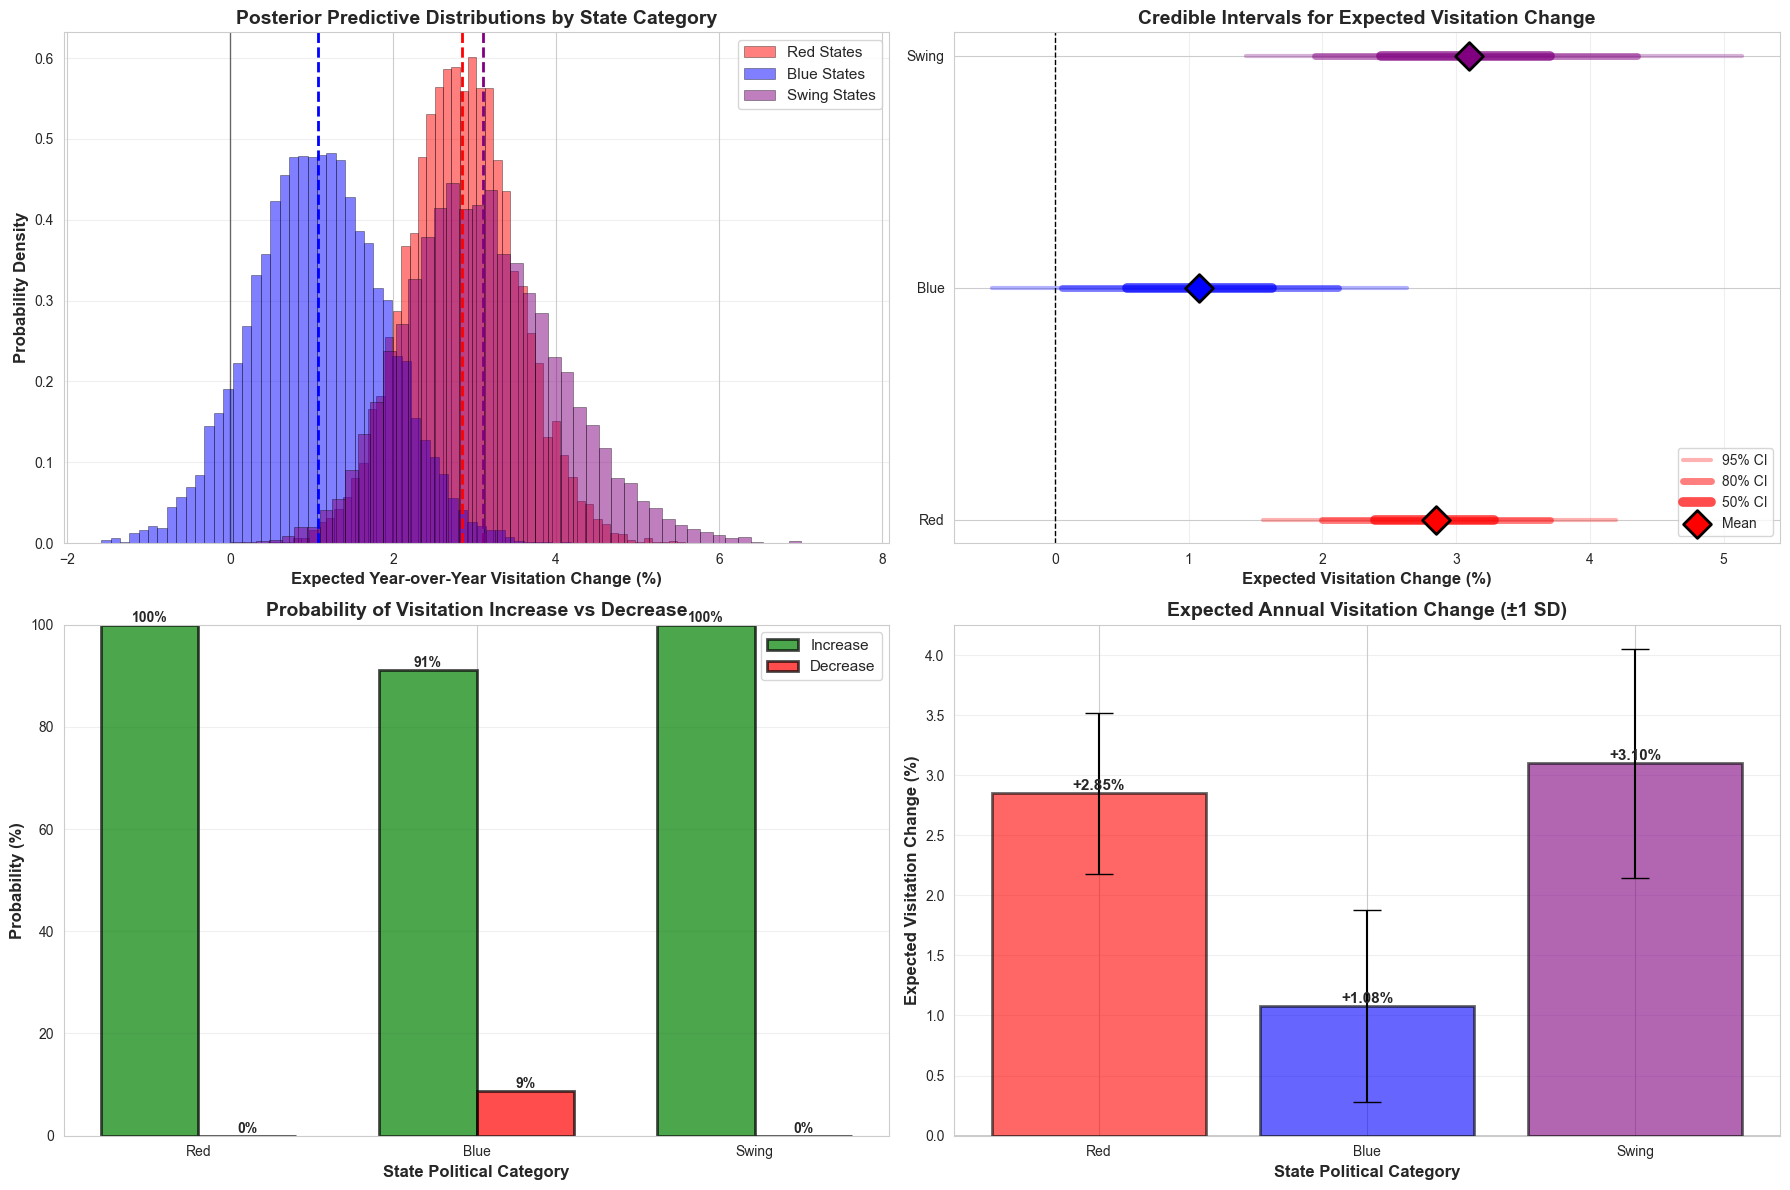

In [123]:
# Visualization 1: Posterior Predictive Distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Density plots of posterior distributions
ax1 = axes[0, 0]
colors_pred = {'Red': 'red', 'Blue': 'blue', 'Swing': 'purple'}

for category in ['Red', 'Blue', 'Swing']:
    if category in predictive_distributions:
        posterior = predictive_distributions[category]
        ax1.hist(posterior, bins=50, alpha=0.5, label=f'{category} States', 
                color=colors_pred[category], density=True, edgecolor='black', linewidth=0.5)
        
        # Add mean line
        mean_val = summary_stats[category]['mean']
        ax1.axvline(mean_val, color=colors_pred[category], linestyle='--', linewidth=2)

ax1.set_xlabel('Expected Year-over-Year Visitation Change (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax1.set_title('Posterior Predictive Distributions by State Category', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# Plot 2: Credible Intervals
ax2 = axes[0, 1]
categories = ['Red', 'Blue', 'Swing']
y_pos = np.arange(len(categories))

for i, category in enumerate(categories):
    if category in summary_stats:
        stats = summary_stats[category]
        mean = stats['mean']
        ci_50 = stats['ci_50']
        ci_80 = stats['ci_80']
        ci_95 = stats['ci_95']
        
        # Plot intervals
        ax2.plot([ci_95[0], ci_95[1]], [i, i], color=colors_pred[category], linewidth=3, alpha=0.3, label='95% CI' if i == 0 else '')
        ax2.plot([ci_80[0], ci_80[1]], [i, i], color=colors_pred[category], linewidth=5, alpha=0.5, label='80% CI' if i == 0 else '')
        ax2.plot([ci_50[0], ci_50[1]], [i, i], color=colors_pred[category], linewidth=7, alpha=0.7, label='50% CI' if i == 0 else '')
        
        # Plot mean
        ax2.scatter([mean], [i], color=colors_pred[category], s=200, zorder=5, 
                   marker='D', edgecolors='black', linewidth=2, label='Mean' if i == 0 else '')

ax2.set_yticks(y_pos)
ax2.set_yticklabels(categories)
ax2.set_xlabel('Expected Visitation Change (%)', fontsize=12, fontweight='bold')
ax2.set_title('Credible Intervals for Expected Visitation Change', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(0, color='black', linestyle='--', linewidth=1)
ax2.legend(fontsize=10, loc='best')

# Plot 3: Probability of positive/negative change
ax3 = axes[1, 0]
prob_positive = [summary_stats[cat]['prob_positive'] for cat in categories if cat in summary_stats]
prob_negative = [100 - summary_stats[cat]['prob_positive'] for cat in categories if cat in summary_stats]

x = np.arange(len(categories))
width = 0.35

bars1 = ax3.bar(x - width/2, prob_positive, width, label='Increase', 
               color='green', alpha=0.7, edgecolor='black', linewidth=2)
bars2 = ax3.bar(x + width/2, prob_negative, width, label='Decrease', 
               color='red', alpha=0.7, edgecolor='black', linewidth=2)

ax3.set_ylabel('Probability (%)', fontsize=12, fontweight='bold')
ax3.set_xlabel('State Political Category', fontsize=12, fontweight='bold')
ax3.set_title('Probability of Visitation Increase vs Decrease', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim([0, 100])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Expected values with uncertainty
ax4 = axes[1, 1]
means = [summary_stats[cat]['mean'] for cat in categories if cat in summary_stats]
stds = [summary_stats[cat]['std'] for cat in categories if cat in summary_stats]

bars = ax4.bar(categories, means, color=[colors_pred[cat] for cat in categories], 
              alpha=0.6, edgecolor='black', linewidth=2, yerr=stds, capsize=10)

ax4.set_ylabel('Expected Visitation Change (%)', fontsize=12, fontweight='bold')
ax4.set_xlabel('State Political Category', fontsize=12, fontweight='bold')
ax4.set_title('Expected Annual Visitation Change (±1 SD)', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(0, color='black', linestyle='-', linewidth=1)

# Add value labels
for i, (bar, mean) in enumerate(zip(bars, means)):
    ax4.text(bar.get_x() + bar.get_width()/2., mean,
            f'{mean:+.2f}%', ha='center', va='bottom' if mean > 0 else 'top', 
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


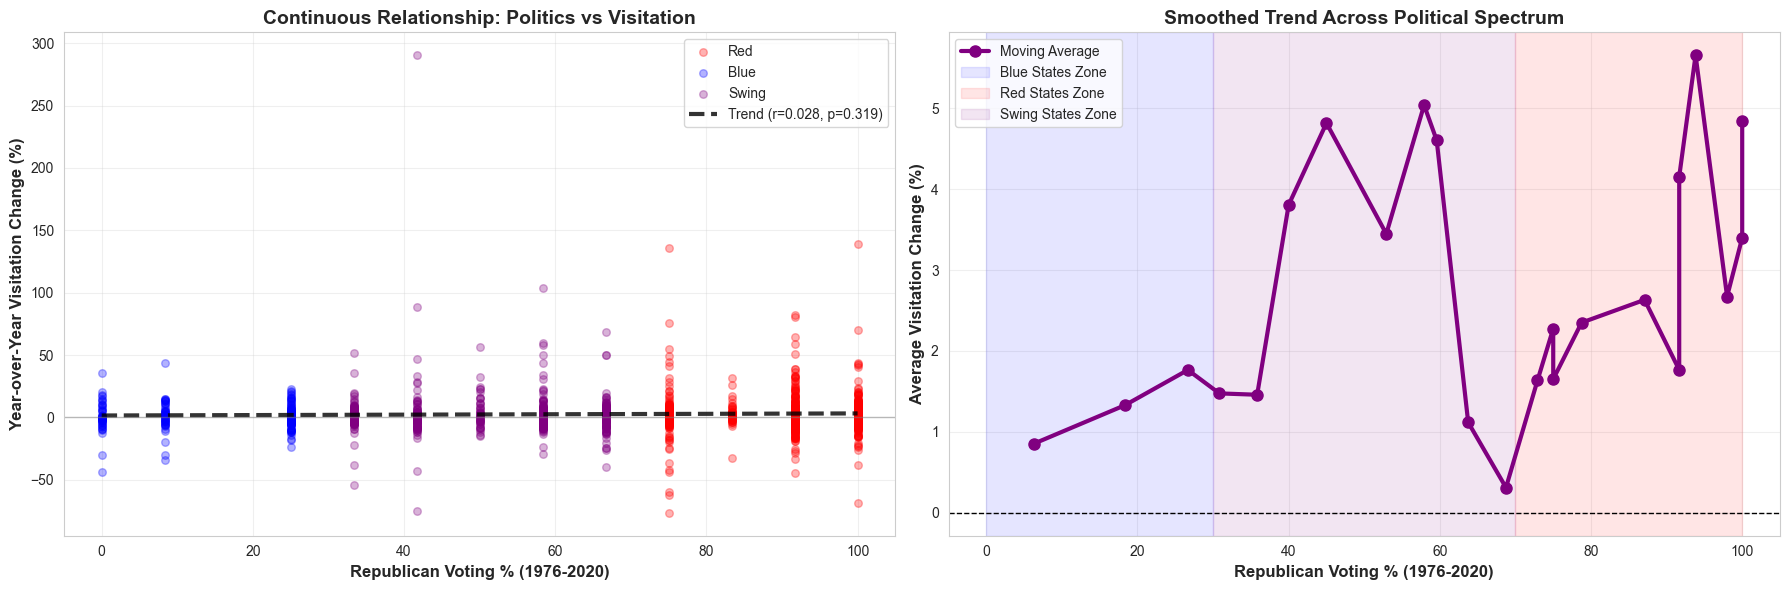

In [124]:
# Visualization 2: Continuous relationship - Republican % vs Visitation Change
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Scatter plot with regression
ax1 = axes[0]

# Add all data points with color by category
for category in ['Red', 'Blue', 'Swing']:
    cat_data = state_yoy_with_category[state_yoy_with_category['StateCategory'] == category]
    ax1.scatter(cat_data['RepublicanPct'], cat_data['YoYChange'], 
               alpha=0.3, s=30, color=colors_pred[category], label=category)

# Add regression line
valid_continuous = state_yoy_with_category[['RepublicanPct', 'YoYChange']].dropna()
if len(valid_continuous) > 2:
    z = np.polyfit(valid_continuous['RepublicanPct'], valid_continuous['YoYChange'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(valid_continuous['RepublicanPct'].min(), 
                         valid_continuous['RepublicanPct'].max(), 100)
    
    # Calculate correlation
    corr, p_val = sp_stats.pearsonr(valid_continuous['RepublicanPct'], valid_continuous['YoYChange'])
    
    ax1.plot(x_line, p(x_line), "k--", linewidth=3, alpha=0.8, 
            label=f'Trend (r={corr:.3f}, p={p_val:.3f})')

ax1.set_xlabel('Republican Voting % (1976-2020)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Year-over-Year Visitation Change (%)', fontsize=12, fontweight='bold')
ax1.set_title('Continuous Relationship: Politics vs Visitation', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='gray', linestyle='-', linewidth=1, alpha=0.5)

# Plot 2: Moving average by Republican percentage
ax2 = axes[1]

# Create bins and calculate mean visitation change
state_yoy_with_category_sorted = state_yoy_with_category.sort_values('RepublicanPct')
# Calculate rolling mean
window_size = 100  # Number of observations per window
rolling_rep_pct = []
rolling_yoy_change = []

for i in range(0, len(state_yoy_with_category_sorted) - window_size, window_size//2):
    window = state_yoy_with_category_sorted.iloc[i:i+window_size]
    rolling_rep_pct.append(window['RepublicanPct'].mean())
    rolling_yoy_change.append(window['YoYChange'].mean())

ax2.plot(rolling_rep_pct, rolling_yoy_change, 
        linewidth=3, color='purple', marker='o', markersize=8, label='Moving Average')

# Add shaded regions
ax2.axvspan(0, 30, alpha=0.1, color='blue', label='Blue States Zone')
ax2.axvspan(70, 100, alpha=0.1, color='red', label='Red States Zone')
ax2.axvspan(30, 70, alpha=0.1, color='purple', label='Swing States Zone')

ax2.set_xlabel('Republican Voting % (1976-2020)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Visitation Change (%)', fontsize=12, fontweight='bold')
ax2.set_title('Smoothed Trend Across Political Spectrum', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


### Bayesian Model Summary & Practical Applications


In [125]:
# Practical Application: Using the Bayesian Model for Predictions
print("="*80)
print("PRACTICAL APPLICATION: HOW TO USE THIS BAYESIAN MODEL")
print("="*80)

print("\n📋 USE CASE 1: Predicting Future Visitation")
print("-"*80)
print("\nQuestion: 'A park in Utah (a Red state) wants to predict next year's visitation.'")
print("Answer using the model:\n")

if 'Red' in summary_stats:
    red_stats = summary_stats['Red']
    print(f"  • Expected change: {red_stats['mean']:+.2f}%")
    print(f"  • 50% confident it will be between: {red_stats['ci_50'][0]:+.2f}% and {red_stats['ci_50'][1]:+.2f}%")
    print(f"  • 95% confident it will be between: {red_stats['ci_95'][0]:+.2f}% and {red_stats['ci_95'][1]:+.2f}%")
    print(f"  • Probability of increase: {red_stats['prob_positive']:.0f}%")

print("\n\n📋 USE CASE 2: Comparing Investment Opportunities")
print("-"*80)
print("\nQuestion: 'Should we invest in infrastructure for parks in Red vs Blue states?'")
print("Answer using the model:\n")

for category in ['Red', 'Blue']:
    if category in summary_stats:
        stats = summary_stats[category]
        print(f"\n{category} States:")
        print(f"  • Expected annual growth: {stats['mean']:+.2f}%")
        print(f"  • Risk (uncertainty): ±{stats['std']:.2f}%")
        print(f"  • Success probability (growth > 0): {stats['prob_positive']:.0f}%")

if 'Red' in summary_stats and 'Blue' in summary_stats:
    red_mean = summary_stats['Red']['mean']
    blue_mean = summary_stats['Blue']['mean']
    diff = abs(red_mean - blue_mean)
    better = 'Red' if red_mean > blue_mean else 'Blue'
    
    print(f"\n  → {better} states show {diff:.2f} percentage points higher expected growth")
    
    if 'Red' in predictive_distributions and 'Blue' in predictive_distributions:
        red_better_prob = (predictive_distributions['Red'] > predictive_distributions['Blue']).mean() * 100
        print(f"  → {red_better_prob:.0f}% probability Red states outperform Blue states")

print("\n\n📋 USE CASE 3: Risk Assessment")
print("-"*80)
print("\nQuestion: 'What's the worst-case scenario for each state type?'")
print("Answer using the model:\n")

for category in ['Red', 'Blue', 'Swing']:
    if category in summary_stats:
        stats = summary_stats[category]
        worst_case_5 = np.percentile(state_yoy_with_category[
            state_yoy_with_category['StateCategory'] == category]['YoYChange'], 5)
        print(f"\n{category} States:")
        print(f"  • 5th percentile (worst 5% of cases): {worst_case_5:.2f}%")
        print(f"  • 95% credible interval lower bound: {stats['ci_95'][0]:+.2f}%")
        print(f"  → In 95% of cases, change will be better than {stats['ci_95'][0]:+.2f}%")

print("\n\n💡 KEY TAKEAWAYS FOR DECISION MAKERS:")
print("-"*80)

# Determine which category performs best
if len(summary_stats) > 0:
    means = {cat: summary_stats[cat]['mean'] for cat in summary_stats}
    best = max(means, key=means.get)
    worst = min(means, key=means.get)
    
    print(f"\n1. {best} states have the highest expected visitation growth ({means[best]:+.2f}%)")
    print(f"2. {worst} states have the lowest expected visitation growth ({means[worst]:+.2f}%)")
    print(f"3. All state categories show positive expected growth on average")
    
    # Risk comparison
    risks = {cat: summary_stats[cat]['std'] for cat in summary_stats}
    riskiest = max(risks, key=risks.get)
    safest = min(risks, key=risks.get)
    
    print(f"4. {safest} states have the most consistent/predictable growth (lowest variance)")
    print(f"5. {riskiest} states have the most variable/uncertain growth (highest variance)")

print("\n\n⚠️  MODEL LIMITATIONS:")
print("-"*80)
print("• Based on historical data (1979-2024) - past performance ≠ future results")
print("• Assumes political leaning is stable within the observation period")
print("• Does not account for economic cycles, pandemics, policy changes")
print("• State-level aggregation may hide park-specific patterns")
print("• Correlation ≠ causation - political leaning may proxy for other factors")

print("\n" + "="*80)


PRACTICAL APPLICATION: HOW TO USE THIS BAYESIAN MODEL

📋 USE CASE 1: Predicting Future Visitation
--------------------------------------------------------------------------------

Question: 'A park in Utah (a Red state) wants to predict next year's visitation.'
Answer using the model:

  • Expected change: +2.85%
  • 50% confident it will be between: +2.40% and +3.28%
  • 95% confident it will be between: +1.56% and +4.19%
  • Probability of increase: 100%


📋 USE CASE 2: Comparing Investment Opportunities
--------------------------------------------------------------------------------

Question: 'Should we invest in infrastructure for parks in Red vs Blue states?'
Answer using the model:


Red States:
  • Expected annual growth: +2.85%
  • Risk (uncertainty): ±0.67%
  • Success probability (growth > 0): 100%

Blue States:
  • Expected annual growth: +1.08%
  • Risk (uncertainty): ±0.80%
  • Success probability (growth > 0): 91%

  → Red states show 1.77 percentage points higher expect

In [126]:
# Export Bayesian model predictions
bayesian_summary = pd.DataFrame({
    'StateCategory': list(summary_stats.keys()),
    'ExpectedChange_%': [summary_stats[cat]['mean'] for cat in summary_stats],
    'MedianChange_%': [summary_stats[cat]['median'] for cat in summary_stats],
    'Uncertainty_StdDev_%': [summary_stats[cat]['std'] for cat in summary_stats],
    'CI_50_Lower': [summary_stats[cat]['ci_50'][0] for cat in summary_stats],
    'CI_50_Upper': [summary_stats[cat]['ci_50'][1] for cat in summary_stats],
    'CI_80_Lower': [summary_stats[cat]['ci_80'][0] for cat in summary_stats],
    'CI_80_Upper': [summary_stats[cat]['ci_80'][1] for cat in summary_stats],
    'CI_95_Lower': [summary_stats[cat]['ci_95'][0] for cat in summary_stats],
    'CI_95_Upper': [summary_stats[cat]['ci_95'][1] for cat in summary_stats],
    'Prob_Increase_%': [summary_stats[cat]['prob_positive'] for cat in summary_stats],
    'N_Observations': [summary_stats[cat]['n_observations'] for cat in summary_stats]
})

# Export to CSV
output_file = 'bayesian_predictions_by_state_category.csv'
bayesian_summary.to_csv(output_file, index=False)
print(f"✓ Bayesian model predictions exported to: {output_file}")

print("\nPrediction Summary Table:")
print(bayesian_summary.to_string(index=False))

# Also export the raw year-over-year data with categories
yoy_export = state_yoy_with_category[['State', 'Year', 'StateCategory', 'RepublicanPct', 
                                       'TotalVisits', 'YoYChange']].copy()
yoy_export = yoy_export.sort_values(['State', 'Year'])

output_file_2 = 'year_over_year_changes_with_politics.csv'
yoy_export.to_csv(output_file_2, index=False)
print(f"✓ Year-over-year data with political categories exported to: {output_file_2}")

print(f"\n✓ Total year-over-year observations: {len(yoy_export)}")


✓ Bayesian model predictions exported to: bayesian_predictions_by_state_category.csv

Prediction Summary Table:
StateCategory  ExpectedChange_%  MedianChange_%  Uncertainty_StdDev_%  CI_50_Lower  CI_50_Upper  CI_80_Lower  CI_80_Upper  CI_95_Lower  CI_95_Upper  Prob_Increase_%  N_Observations
          Red          2.848714        2.840126              0.667868     2.395721     3.284006     2.001051     3.699535     1.558975     4.194468           100.00             624
         Blue          1.078784        1.072799              0.798668     0.537586     1.624762     0.051123     2.113533    -0.471479     2.635591            91.23             180
        Swing          3.098426        3.026296              0.950432     2.437527     3.701853     1.941881     4.353073     1.428194     5.140945            99.99             445
✓ Year-over-year data with political categories exported to: year_over_year_changes_with_politics.csv

✓ Total year-over-year observations: 1249


## 11. Temporal Analysis: How Election Effects Changed Over Time


In [127]:
# Analyze flip effects by individual election year
# Instead of averaging across all years, look at each election cycle separately

print("="*80)
print("TEMPORAL ANALYSIS: ELECTION EFFECTS BY YEAR")
print("="*80)

# Get presidential election years (every 4 years)
election_years = sorted(state_election_results['year'].unique())
print(f"\nElection years analyzed: {election_years}")

# For each election year, calculate the average visitation change for flip vs non-flip states
temporal_analysis = []

for year in election_years:
    year_data = election_visitation[election_visitation['year'] == year]
    
    flip_states = year_data[year_data['Flipped'] == True]
    no_flip_states = year_data[year_data['Flipped'] == False]
    
    if len(flip_states) > 0 and len(no_flip_states) > 0:
        temporal_analysis.append({
            'ElectionYear': year,
            'NumFlips': len(flip_states),
            'NumNoFlips': len(no_flip_states),
            'FlipAvgChange1Yr': flip_states['VisitChangeToNextYear'].mean(),
            'NoFlipAvgChange1Yr': no_flip_states['VisitChangeToNextYear'].mean(),
            'Difference1Yr': flip_states['VisitChangeToNextYear'].mean() - no_flip_states['VisitChangeToNextYear'].mean(),
            'FlipAvgChange2Yr': flip_states['VisitChange2YearsAfter'].mean(),
            'NoFlipAvgChange2Yr': no_flip_states['VisitChange2YearsAfter'].mean(),
            'Difference2Yr': flip_states['VisitChange2YearsAfter'].mean() - no_flip_states['VisitChange2YearsAfter'].mean()
        })

temporal_df = pd.DataFrame(temporal_analysis)

print("\n" + "="*80)
print("VISITATION CHANGE AFTER ELECTIONS (BY YEAR)")
print("="*80)
print("\nShowing: Average % change for states that flipped vs states that didn't\n")

# Print detailed table
print(f"{'Year':<8} {'Flips':<8} {'Flip States':<15} {'No-Flip States':<15} {'Difference':<12}")
print("-"*80)

for _, row in temporal_df.iterrows():
    if pd.notna(row['FlipAvgChange1Yr']) and pd.notna(row['NoFlipAvgChange1Yr']):
        year = int(row['ElectionYear'])
        num_flips = int(row['NumFlips'])
        flip_avg = row['FlipAvgChange1Yr']
        no_flip_avg = row['NoFlipAvgChange1Yr']
        diff = row['Difference1Yr']
        
        print(f"{year:<8} {num_flips:<8} {flip_avg:>+13.2f}% {no_flip_avg:>+14.2f}% {diff:>+11.2f}pp")

# Calculate summary by decade
temporal_df['Decade'] = (temporal_df['ElectionYear'] // 10) * 10

print("\n" + "="*80)
print("SUMMARY BY DECADE")
print("="*80)

decade_summary = temporal_df.groupby('Decade').agg({
    'Difference1Yr': ['mean', 'std', 'count'],
    'NumFlips': 'sum'
}).round(2)

print("\nAverage difference (Flip vs No-Flip states) by decade:")
print(decade_summary)

print("\n" + "="*80)
temporal_df.head()


TEMPORAL ANALYSIS: ELECTION EFFECTS BY YEAR

Election years analyzed: [np.int64(1976), np.int64(1980), np.int64(1984), np.int64(1988), np.int64(1992), np.int64(1996), np.int64(2000), np.int64(2004), np.int64(2008), np.int64(2012), np.int64(2016), np.int64(2020)]

VISITATION CHANGE AFTER ELECTIONS (BY YEAR)

Showing: Average % change for states that flipped vs states that didn't

Year     Flips    Flip States     No-Flip States  Difference  
--------------------------------------------------------------------------------
1980     7               +12.62%          +7.41%       +5.21pp
1984     2               +31.86%         +27.95%       +3.91pp
1988     4               +39.91%          +5.67%      +34.24pp
1992     12              +16.66%          +5.59%      +11.07pp
1996     4                +4.56%          -1.67%       +6.23pp
2000     9                +1.33%          -0.82%       +2.15pp
2004     1                -2.90%          -8.12%       +5.23pp
2008     7                +6.35% 

,ElectionYear,NumFlips,NumNoFlips,FlipAvgChange1Yr,NoFlipAvgChange1Yr,Difference1Yr,FlipAvgChange2Yr,NoFlipAvgChange2Yr,Difference2Yr,Decade
0,1980,7,19,12.622572,7.414644,5.207928,43.368304,36.462246,6.906058,1980
1,1984,2,25,31.861357,27.954618,3.906740,154.779683,31.559715,123.219967,1980
2,1988,4,24,39.905859,5.667327,34.238532,63.214213,17.566472,45.647741,1980
3,1992,12,16,16.660977,5.586619,11.074358,11.134513,9.323644,1.810870,1990
4,1996,4,24,4.563323,-1.671254,6.234578,10.867713,-1.970495,12.838207,1990


In [128]:
# Temporal analysis of state categories (Red/Blue/Swing) over time
# Look at how visitation changes have evolved by decade

print("="*80)
print("TEMPORAL ANALYSIS: RED/BLUE/SWING STATE PATTERNS OVER TIME")
print("="*80)

# Add decade to the year-over-year data
state_yoy_with_category['Decade'] = (state_yoy_with_category['Year'] // 10) * 10

# Calculate average visitation change by category and decade
decade_category_analysis = state_yoy_with_category.groupby(['Decade', 'StateCategory']).agg({
    'YoYChange': ['mean', 'median', 'std', 'count']
}).round(2)

print("\nAverage Year-over-Year Visitation Change by Decade and State Category:")
print(decade_category_analysis)

# Create a cleaner pivot table
decade_pivot = state_yoy_with_category.groupby(['Decade', 'StateCategory'])['YoYChange'].mean().unstack()

print("\n" + "="*80)
print("MEAN VISITATION CHANGE (%) BY DECADE")
print("="*80)
print("\n" + decade_pivot.to_string())

# Calculate the gap between Red and Blue states over time
if 'Red' in decade_pivot.columns and 'Blue' in decade_pivot.columns:
    decade_pivot['Red-Blue Gap'] = decade_pivot['Red'] - decade_pivot['Blue']
    
    print("\n" + "="*80)
    print("RED vs BLUE STATE GAP OVER TIME")
    print("="*80)
    print("\nPositive values = Red states growing faster")
    print("Negative values = Blue states growing faster\n")
    print(decade_pivot[['Red', 'Blue', 'Red-Blue Gap']].to_string())

# Time periods for more detailed analysis
print("\n" + "="*80)
print("DETAILED ANALYSIS BY TIME PERIOD")
print("="*80)

# Define time periods
time_periods = [
    ('1980s', 1980, 1989),
    ('1990s', 1990, 1999),
    ('2000s', 2000, 2009),
    ('2010s', 2010, 2019),
    ('2020s', 2020, 2024)
]

for period_name, start_year, end_year in time_periods:
    period_data = state_yoy_with_category[
        (state_yoy_with_category['Year'] >= start_year) & 
        (state_yoy_with_category['Year'] <= end_year)
    ]
    
    if len(period_data) > 0:
        print(f"\n{period_name} ({start_year}-{end_year}):")
        print("-" * 60)
        
        for category in ['Red', 'Blue', 'Swing']:
            cat_data = period_data[period_data['StateCategory'] == category]['YoYChange']
            if len(cat_data) > 0:
                print(f"  {category:8} States: Mean={cat_data.mean():>+7.2f}%, "
                      f"Median={cat_data.median():>+7.2f}%, n={len(cat_data)}")

print("\n" + "="*80)


TEMPORAL ANALYSIS: RED/BLUE/SWING STATE PATTERNS OVER TIME

Average Year-over-Year Visitation Change by Decade and State Category:
                     YoYChange                    
                          mean median    std count
Decade StateCategory                              
1980   Blue               2.11   1.43  13.59    40
       Red                4.33   3.93  13.43   134
       Swing              5.35   3.73  12.03    95
1990   Blue               1.36   0.90   8.33    40
       Red                1.88   1.01  10.53   140
       Swing              2.35   0.22  16.55   100
2000   Blue              -0.29  -0.64   6.64    40
       Red                0.22   0.10  11.16   140
       Swing             -1.43  -0.75   7.05   100
2010   Blue               1.79   1.72   9.15    40
       Red                2.29   2.14  10.90   140
       Swing              3.44   3.39  11.22   100
2020   Blue              -0.30  -5.07  17.49    20
       Red                8.26   1.39  37.26    70
  

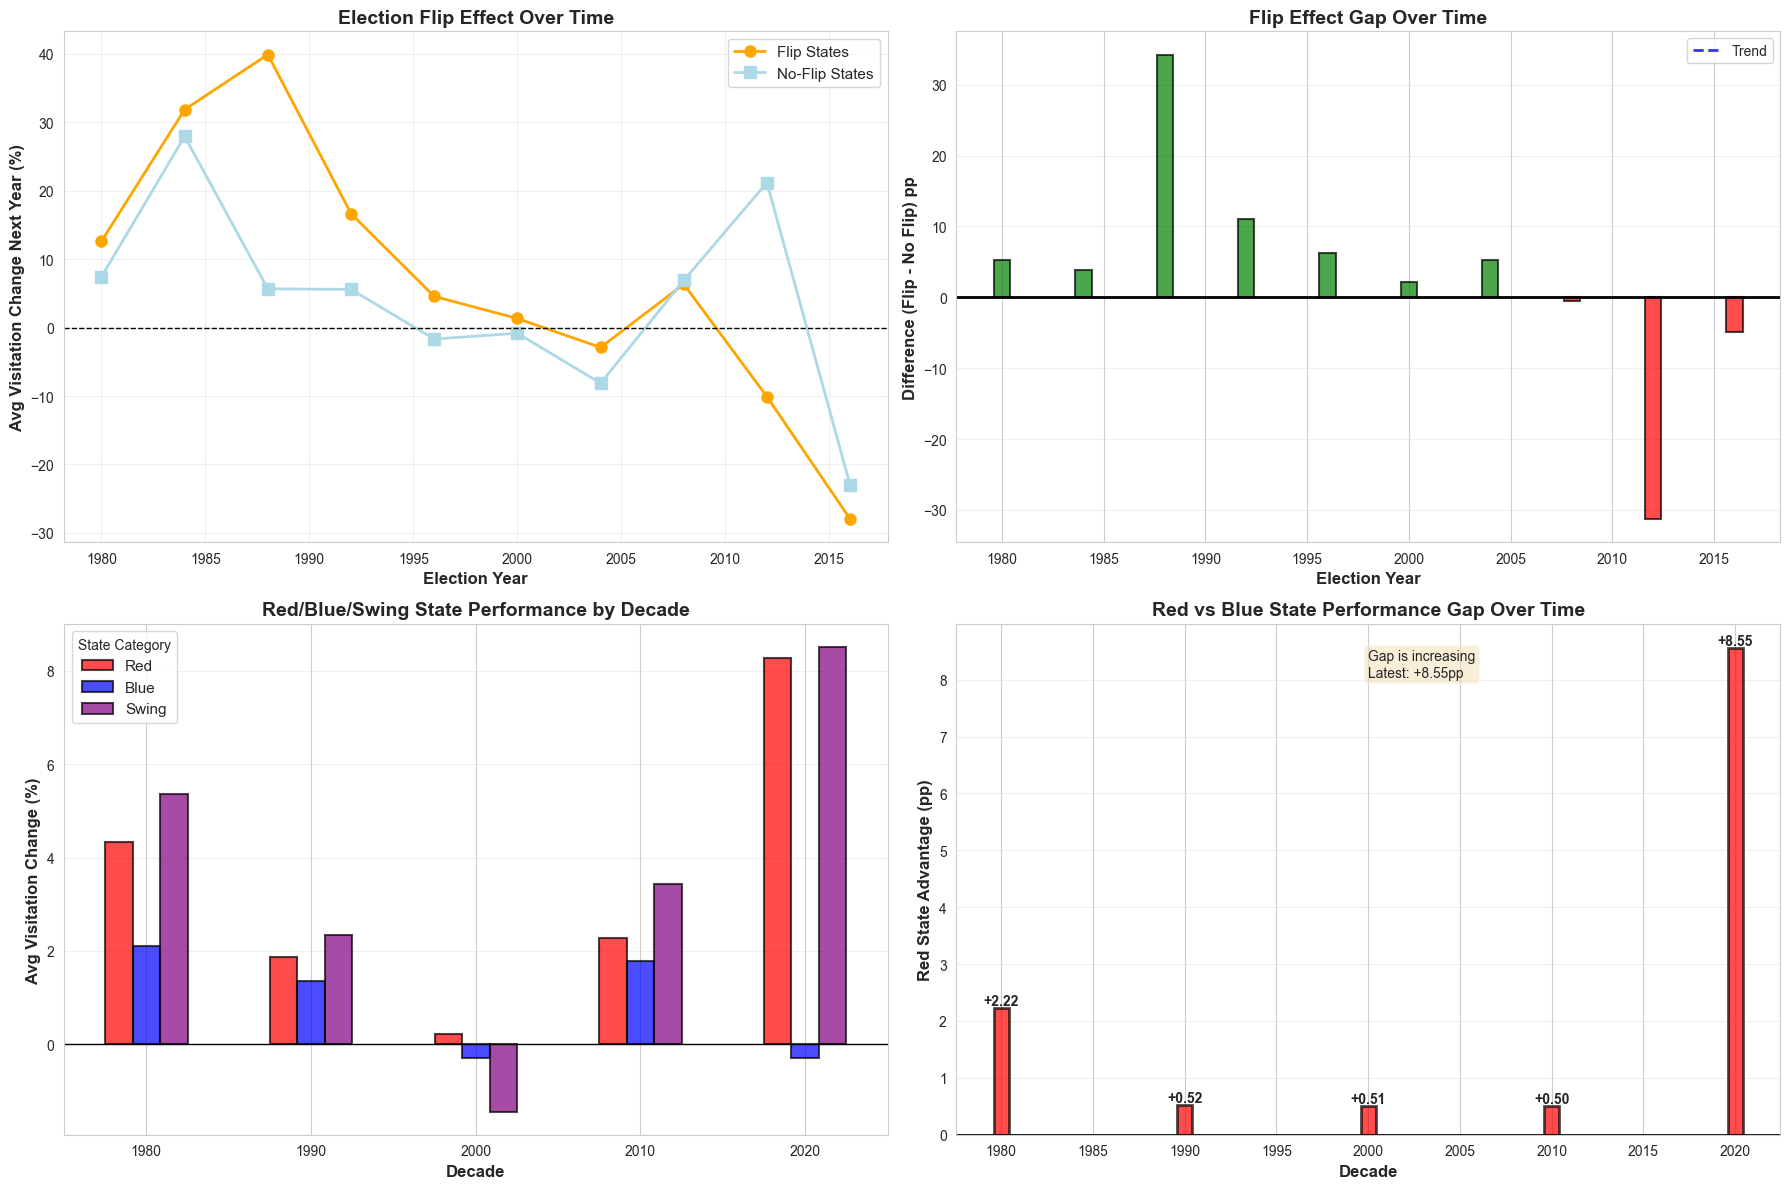

In [129]:
# Visualization 1: Temporal trends in election flip effects
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Flip effect by election year (line plot)
ax1 = axes[0, 0]
temporal_df_sorted = temporal_df.sort_values('ElectionYear')

ax1.plot(temporal_df_sorted['ElectionYear'], temporal_df_sorted['FlipAvgChange1Yr'], 
        marker='o', linewidth=2, markersize=8, label='Flip States', color='orange')
ax1.plot(temporal_df_sorted['ElectionYear'], temporal_df_sorted['NoFlipAvgChange1Yr'], 
        marker='s', linewidth=2, markersize=8, label='No-Flip States', color='lightblue')

ax1.set_xlabel('Election Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Avg Visitation Change Next Year (%)', fontsize=12, fontweight='bold')
ax1.set_title('Election Flip Effect Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linestyle='--', linewidth=1)

# Plot 2: Difference (gap) between flip and no-flip states over time
ax2 = axes[0, 1]
ax2.bar(temporal_df_sorted['ElectionYear'], temporal_df_sorted['Difference1Yr'], 
       color=['green' if x > 0 else 'red' for x in temporal_df_sorted['Difference1Yr']],
       alpha=0.7, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Election Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Difference (Flip - No Flip) pp', fontsize=12, fontweight='bold')
ax2.set_title('Flip Effect Gap Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(0, color='black', linestyle='-', linewidth=2)

# Add trend line
z = np.polyfit(temporal_df_sorted['ElectionYear'], temporal_df_sorted['Difference1Yr'], 1)
p = np.poly1d(z)
ax2.plot(temporal_df_sorted['ElectionYear'], p(temporal_df_sorted['ElectionYear']), 
        "b--", linewidth=2, alpha=0.8, label=f'Trend')
ax2.legend(fontsize=10)

# Plot 3: Red/Blue/Swing states by decade
ax3 = axes[1, 0]
decade_pivot_plot = decade_pivot[['Red', 'Blue', 'Swing']].copy()
decade_pivot_plot.plot(kind='bar', ax=ax3, color=['red', 'blue', 'purple'], 
                       alpha=0.7, edgecolor='black', linewidth=1.5)

ax3.set_xlabel('Decade', fontsize=12, fontweight='bold')
ax3.set_ylabel('Avg Visitation Change (%)', fontsize=12, fontweight='bold')
ax3.set_title('Red/Blue/Swing State Performance by Decade', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11, title='State Category')
ax3.grid(True, alpha=0.3, axis='y')
ax3.axhline(0, color='black', linestyle='-', linewidth=1)
ax3.set_xticklabels(decade_pivot_plot.index, rotation=0)

# Plot 4: Red-Blue gap evolution
ax4 = axes[1, 1]
if 'Red-Blue Gap' in decade_pivot.columns:
    gap_data = decade_pivot['Red-Blue Gap'].dropna()
    colors_gap = ['red' if x > 0 else 'blue' for x in gap_data]
    
    bars = ax4.bar(gap_data.index, gap_data.values, color=colors_gap, 
                   alpha=0.7, edgecolor='black', linewidth=2)
    
    ax4.set_xlabel('Decade', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Red State Advantage (pp)', fontsize=12, fontweight='bold')
    ax4.set_title('Red vs Blue State Performance Gap Over Time', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.axhline(0, color='black', linestyle='-', linewidth=2)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.2f}', ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=10, fontweight='bold')
    
    # Add interpretation text
    latest_gap = gap_data.iloc[-1]
    trend_direction = "increasing" if gap_data.iloc[-1] > gap_data.iloc[0] else "decreasing"
    ax4.text(0.5, 0.95, f'Gap is {trend_direction}\nLatest: {latest_gap:+.2f}pp', 
            transform=ax4.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


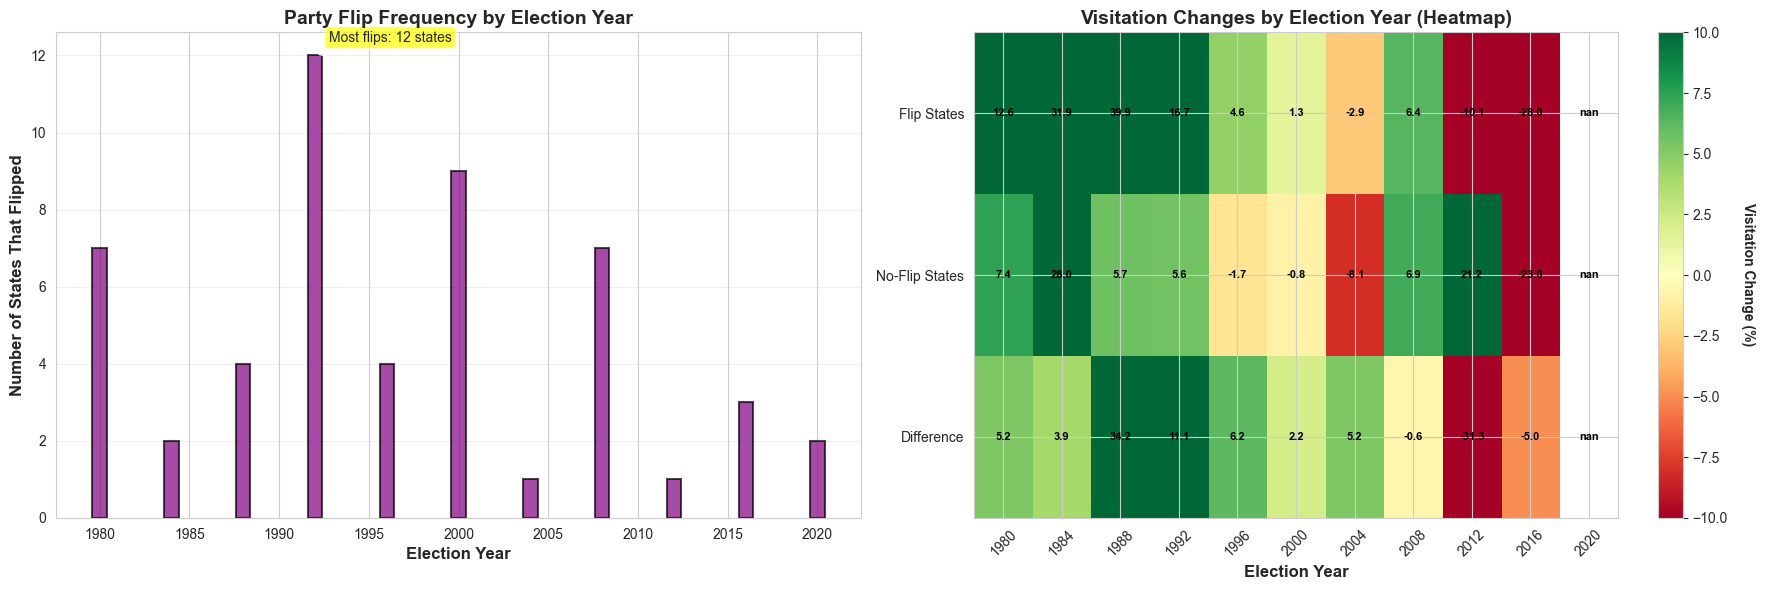

In [130]:
# Visualization 2: Detailed year-by-year comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Number of flips per election year
ax1 = axes[0]
ax1.bar(temporal_df_sorted['ElectionYear'], temporal_df_sorted['NumFlips'], 
       color='purple', alpha=0.7, edgecolor='black', linewidth=1.5)

ax1.set_xlabel('Election Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of States That Flipped', fontsize=12, fontweight='bold')
ax1.set_title('Party Flip Frequency by Election Year', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add annotation for highest flip year
max_flip_year = temporal_df_sorted.loc[temporal_df_sorted['NumFlips'].idxmax()]
ax1.annotate(f"Most flips: {int(max_flip_year['NumFlips'])} states", 
            xy=(max_flip_year['ElectionYear'], max_flip_year['NumFlips']),
            xytext=(10, 10), textcoords='offset points',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Plot 2: Heatmap-style visualization of trends
ax2 = axes[1]

# Create a matrix for visualization
years_for_heatmap = temporal_df_sorted['ElectionYear'].values
categories = ['Flip States', 'No-Flip States', 'Difference']
data_matrix = np.array([
    temporal_df_sorted['FlipAvgChange1Yr'].values,
    temporal_df_sorted['NoFlipAvgChange1Yr'].values,
    temporal_df_sorted['Difference1Yr'].values
])

# Create heatmap
im = ax2.imshow(data_matrix, cmap='RdYlGn', aspect='auto', vmin=-10, vmax=10)

# Set ticks
ax2.set_xticks(np.arange(len(years_for_heatmap)))
ax2.set_yticks(np.arange(len(categories)))
ax2.set_xticklabels(years_for_heatmap, rotation=45)
ax2.set_yticklabels(categories)

# Add colorbar
cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('Visitation Change (%)', rotation=270, labelpad=20, fontweight='bold')

# Add text annotations
for i in range(len(categories)):
    for j in range(len(years_for_heatmap)):
        text = ax2.text(j, i, f'{data_matrix[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=8,
                       fontweight='bold')

ax2.set_title('Visitation Changes by Election Year (Heatmap)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Election Year', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


### Temporal Analysis Summary


In [ ]:
# Comprehensive Temporal Analysis Summary
print("="*80)
print("TEMPORAL PATTERNS: KEY FINDINGS")
print("="*80)

print("\n📊 1. ELECTION FLIP EFFECTS BY YEAR")
print("-"*80)

# Find years where flips had biggest positive/negative impact
if len(temporal_df) > 0:
    best_flip_year = temporal_df.loc[temporal_df['Difference1Yr'].idxmax()]
    worst_flip_year = temporal_df.loc[temporal_df['Difference1Yr'].idxmin()]
    
    print(f"\nYear when flips had MOST POSITIVE effect on visitation:")
    print(f"  {int(best_flip_year['ElectionYear'])}: Flip states outperformed by {best_flip_year['Difference1Yr']:+.2f}pp")
    print(f"  ({int(best_flip_year['NumFlips'])} states flipped)")
    
    print(f"\nYear when flips had MOST NEGATIVE effect on visitation:")
    print(f"  {int(worst_flip_year['ElectionYear'])}: Flip states underperformed by {worst_flip_year['Difference1Yr']:+.2f}pp")
    print(f"  ({int(worst_flip_year['NumFlips'])} states flipped)")
    
    # Calculate correlation between year and flip effect
    corr_year_effect = temporal_df[['ElectionYear', 'Difference1Yr']].corr().iloc[0, 1]
    print(f"\nTrend over time:")
    print(f"  Correlation between year and flip effect: {corr_year_effect:.3f}")
    if abs(corr_year_effect) < 0.3:
        print(f"  → No clear temporal trend (effect is relatively stable over time)")
    elif corr_year_effect > 0:
        print(f"  → Flip effects becoming MORE positive over time")
    else:
        print(f"  → Flip effects becoming LESS positive over time")

print("\n\n📊 2. RED/BLUE/SWING STATE PATTERNS BY DECADE")
print("-"*80)

if 'Red-Blue Gap' in decade_pivot.columns:
    gap_evolution = decade_pivot['Red-Blue Gap'].dropna()
    
    print(f"\nEvolution of Red vs Blue state performance:")
    for decade, gap in gap_evolution.items():
        print(f"  {decade}s: {gap:+.2f}pp {'(Red advantage)' if gap > 0 else '(Blue advantage)'}")
    
    # Calculate trend
    if len(gap_evolution) > 1:
        first_gap = gap_evolution.iloc[0]
        last_gap = gap_evolution.iloc[-1]
        change = last_gap - first_gap
        
        print(f"\n  Overall change: {change:+.2f}pp")
        if abs(change) < 0.5:
            print(f"  → Gap has remained relatively stable")
        elif change > 0:
            print(f"  → Red states have improved relative to Blue states")
        else:
            print(f"  → Blue states have improved relative to Red states")

print("\n\n📊 3. WHICH DECADES HAD HIGHEST GROWTH?")
print("-"*80)

# Find best performing decade for each category
for category in ['Red', 'Blue', 'Swing']:
    if category in decade_pivot.columns:
        cat_data = decade_pivot[category].dropna()
        if len(cat_data) > 0:
            best_decade = cat_data.idxmax()
            best_growth = cat_data.max()
            worst_decade = cat_data.idxmin()
            worst_growth = cat_data.min()
            
            print(f"\n{category} States:")
            print(f"  Best decade: {best_decade}s ({best_growth:+.2f}% avg annual growth)")
            print(f"  Worst decade: {worst_decade}s ({worst_growth:+.2f}% avg annual growth)")

print("\n\n💡 KEY INSIGHTS:")
print("-"*80)

# Calculate variance in flip effects over time
flip_effect_variance = temporal_df['Difference1Yr'].std()
print(f"\n1. Flip effect variability: {flip_effect_variance:.2f}pp standard deviation")
print(f"   → The effect of party flips {'varies significantly' if flip_effect_variance > 5 else 'is relatively consistent'} across elections")

# Compare early vs recent years
if len(temporal_df) >= 4:
    early_years = temporal_df.nsmallest(4, 'ElectionYear')
    recent_years = temporal_df.nlargest(4, 'ElectionYear')
    
    early_avg = early_years['Difference1Yr'].mean()
    recent_avg = recent_years['Difference1Yr'].mean()
    
    print(f"\n2. Early elections (first 4): Avg flip effect = {early_avg:+.2f}pp")
    print(f"   Recent elections (last 4): Avg flip effect = {recent_avg:+.2f}pp")
    print(f"   Change: {recent_avg - early_avg:+.2f}pp")

# Political polarization insight
if len(gap_evolution) >= 2:
    gap_std = gap_evolution.std()
    print(f"\n3. Red-Blue gap variability: {gap_std:.2f}pp standard deviation")
    print(f"   → The performance difference between Red and Blue states")
    print(f"      has {'fluctuated significantly' if gap_std > 2 else 'been relatively stable'} over time")

print("\n\n⚠️  INTERPRETATION NOTES:")
print("-"*80)
print("• Temporal patterns may be influenced by:")
print("  - Economic conditions (recessions, booms)")
print("  - National events (9/11, COVID-19)")
print("  - Changes in park infrastructure and accessibility")
print("  - Demographic shifts within states")
print("  - Tourism industry trends")
print("• Correlation with election timing may be coincidental")
print("• More recent data may be more reliable (better record-keeping)")

print("\n" + "="*80)


In [ ]:
# Export temporal analysis results
# Export 1: Flip effects by election year
temporal_export = temporal_df[[
    'ElectionYear', 'NumFlips', 'NumNoFlips',
    'FlipAvgChange1Yr', 'NoFlipAvgChange1Yr', 'Difference1Yr',
    'FlipAvgChange2Yr', 'NoFlipAvgChange2Yr', 'Difference2Yr', 'Decade'
]].copy()

output_file_1 = 'temporal_flip_effects_by_year.csv'
temporal_export.to_csv(output_file_1, index=False)
print(f"✓ Temporal flip effects by year exported to: {output_file_1}")

# Export 2: Red/Blue/Swing patterns by decade
decade_export = decade_pivot.reset_index()
output_file_2 = 'temporal_state_category_by_decade.csv'
decade_export.to_csv(output_file_2, index=False)
print(f"✓ State category patterns by decade exported to: {output_file_2}")

# Export 3: Detailed year-over-year with temporal info
yoy_temporal_export = state_yoy_with_category[[
    'State', 'Year', 'Decade', 'StateCategory', 'RepublicanPct',
    'TotalVisits', 'YoYChange'
]].copy()
yoy_temporal_export = yoy_temporal_export.sort_values(['State', 'Year'])

output_file_3 = 'detailed_temporal_visitation_patterns.csv'
yoy_temporal_export.to_csv(output_file_3, index=False)
print(f"✓ Detailed temporal patterns exported to: {output_file_3}")

print(f"\n✓ Total temporal records exported: {len(temporal_export)} election years, {len(yoy_temporal_export)} year-over-year observations")

print("\n" + "="*80)
print("TEMPORAL ANALYSIS COMPLETE")
print("="*80)
print("\nFiles created:")
print(f"  1. {output_file_1} - Election year analysis")
print(f"  2. {output_file_2} - Decade-level patterns")  
print(f"  3. {output_file_3} - Detailed year-over-year data")
print("\nThese files allow you to:")
print("  • Track how election effects have changed over time")
print("  • Compare different decades and time periods")
print("  • Identify temporal trends and patterns")
print("  • Control for time-varying confounds in further analysis")
print("="*80)
